In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

#スレッド数を5に設定
os.environ["OMP_NUM_THREADS"] = "5"

import tensorflow as tf
from tensorflow.python.eager import context

tf.config.threading.set_intra_op_parallelism_threads(5)
tf.config.threading.set_inter_op_parallelism_threads(5)
_ = tf.Variable([1])

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

## データの読み込み

In [2]:
malware_data = pd.read_csv('data/Datastore/Malware_reports.csv', header=None)
malware_data

,0,1,2,3,4,5,6,7,8
0,147.255.183.98,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl
1,173.234.122.146,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl
2,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl
3,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl
4,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl
...,...,...,...,...,...,...,...,...,...
3190524,54.230.71.204,US,16509,sub.baurake.info,"AMAZON-02 - Amazon.com, Inc.",11,2,2015,malwareblacklist
3190525,91.213.29.10,CZ,196804,nonetnet.com,--,10,7,2011,malwareblacklist
3190526,91.213.29.100,CZ,196804,abosalorblog.info,--,6,7,2011,malwareblacklist
3190527,195.226.220.40,UA,51354,blogvkova.ru,AM-TLD-ANYCAST-AS,29,7,2011,malwareblacklist


In [3]:
malware_data_init = malware_data[malware_data[8].str.contains('VT')==False]
malware_data_init.shape

(1006171, 9)

In [4]:
exploit_data = pd.read_csv('data/Datastore/Exploits_reports.csv', header=None)
exploit_data

,0,1,2,3,4,5,6,7,8
0,185.45.192.51,AE,60117,qasarbworms.com,"HS Host Sailor Ltd.,AE",12,3,2015,hphosts:VT
1,185.45.192.51,AE,60117,qasarbworms.com,HS Host Sailor Ltd.,13,3,2015,hphosts
2,69.50.130.194,US,22384,virtualdownloader.com,"NATIONALNET-1 - NationalNet, Inc.,US",2,7,2013,hphosts:VT
3,127.42.0.252,NaN,-1,virtualdownloader.com,--,13,4,2017,hphosts
4,178.32.131.253,FR,16276,tn4oty.gs.govtax.org,"OVH OVH SAS,FR",16,2,2015,hphosts:VT
...,...,...,...,...,...,...,...,...,...
201103,120.151.195.152,AU,1221,NaN,ASN-TELSTRA Telstra Pty Ltd,10,3,2016,webiron
201104,159.253.209.197,GB,34934,NaN,UKFAST UKfastnet Ltd,10,3,2016,webiron
201105,89.136.246.80,AT,6830,NaN,LGI-UPC Liberty Global Operations B.V.,10,3,2016,webiron
201106,104.148.118.51,US,46573,NaN,GLOBAL-FRAG-NETWORKS - Global Frag Networks,3,5,2017,webiron


In [5]:
exploit_data_init = exploit_data[exploit_data[8].str.contains('VT')==False]
exploit_data_init.shape

(60147, 9)

In [6]:
fs_data = pd.read_csv('data/Datastore/Fraudlent Services_reports.csv', header=None)
fs_data

,0,1,2,3,4,5,6,7,8
0,87.236.19.51,RU,198610,the-best-invest.ru,"BEGET-AS Beget Ltd,RU",9,6,2016,hphosts:VT
1,87.236.19.51,RU,198610,the-best-invest.ru,BEGET-AS,9,6,2016,hphosts
2,193.109.68.136,NL,57043,974-fitness.com-93d.net,"HOSTKEY-AS HOSTKEY B.V.,NL",29,4,2015,hphosts:VT
3,88.208.85.95,SK,29208,974-fitness.com-93d.net,"DIALTELECOM-AS Dial Telecom, a.s.,SK",29,4,2015,hphosts:VT
4,88.208.85.95,SK,29208,974-fitness.com-93d.net,"DIALTELECOM-AS Dial Telecom, a.s.",29,4,2015,hphosts
...,...,...,...,...,...,...,...,...,...
829296,51.255.65.53,FR,16276,NaN,OVH,2,5,2017,webiron
829297,51.255.66.144,FR,16276,NaN,OVH,2,5,2017,webiron
829298,137.74.201.100,FR,16276,NaN,OVH,2,5,2017,webiron
829299,51.255.65.77,FR,16276,NaN,OVH,2,5,2017,webiron


In [7]:
fs_data_init = fs_data[fs_data[8].str.contains('VT')==False]
fs_data_init.shape

(297658, 9)

In [8]:
phishing_data = pd.read_csv('data/Datastore/Phishing_reports.csv', header=None)
phishing_data

,0,1,2,3,4,5,6,7,8
0,77.221.130.20,RU,30968,pdll.ru,"INFOBOX-AS Infobox.ru Autonomous System,RU",10,2,2015,malware_urls:VT
1,190.209.244.118,CL,6535,pdll.ru,Telmex Servicios Empresariales S.A.,21,6,2010,malware_urls
2,87.106.228.159,--,8560,thewoodcutterhartlepool.co.uk,ONEANDONE-AS 1&1 Internet AG,28,9,2009,malware_urls
3,190.55.15.201,AR,27747,titledeclaracion.bde.es.psdrv.ru,Telecentro S.A.,21,6,2010,malware_urls
4,121.54.171.31,HK,38197,buddies-block-us.com,SUNHK-DATA-AS-AP Sun Network (Hong Kong) Limited,29,5,2010,malware_urls
...,...,...,...,...,...,...,...,...,...
2382884,83.223.124.161,GB,29017,rooibosrocks.com,GYRON ====,18,4,2017,openphish
2382885,213.157.215.229,GE,16010,inovdev.ge,"RUSTAVI2ONLINEAS Caucasus Online LLC,GE",25,4,2017,openphish:VT
2382886,213.157.215.229,GE,16010,inovdev.ge,MAGTICOMAS,2,5,2017,openphish
2382887,108.167.172.156,US,20013,subscribe-free.info,"CYRUSONE - CyrusOne LLC,US",16,10,2016,openphish:VT


In [9]:
phishing_data_init = phishing_data[phishing_data[8].str.contains('VT')==False]
phishing_data_init.shape

(164149, 9)

In [10]:
spammers_data = pd.read_csv('data/Datastore/Spammers_reports.csv', header=None)
spammers_data

,0,1,2,3,4,5,6,7,8
0,78.110.166.43,GB,42831,buyvpxlcheap.net,UKSERVERS-AS UK Dedicated Servers Limited,29,5,2010,malware_urls
1,116.255.148.216,CN,4837,medicsser.ru,CHINA169-BACKBONE CNCGROUP China169 Backbone,16,12,2010,malware_urls
2,116.255.148.216,CN,4837,ounddoctor.ru,CHINA169-BACKBONE CNCGROUP China169 Backbone,16,12,2010,malware_urls
3,64.20.63.60,US,19318,NaN,NJIIX-AS-1 - NEW JERSEY INTERNATIONAL INTERNET...,10,12,2010,malware_urls
4,58.158.177.102,--,17506,secureplace.biz,"UCOM UCOM Corp.,JP",20,8,2015,malware_urls:VT
...,...,...,...,...,...,...,...,...,...
6913,62.149.128.72,IT,31034,001edizioni.com,"ARUBA-ASN Aruba S.p.A.,IT",5,6,2017,ransometracker:VT
6914,62.149.128.74,IT,31034,001edizioni.com,"ARUBA-ASN Aruba S.p.A.,IT",5,6,2017,ransometracker:VT
6915,69.163.171.33,US,26347,001edizioni.com,"DREAMHOST-AS - New Dream Network, LLC,US",10,3,2014,ransometracker:VT
6916,69.163.200.61,US,26347,001edizioni.com,"DREAMHOST-AS - New Dream Network, LLC,US",22,12,2014,ransometracker:VT


In [11]:
spammers_data_init = spammers_data[spammers_data[8].str.contains('VT')==False]
spammers_data_init.shape

(2691, 9)

In [12]:
pup_data = pd.read_csv('data/Datastore/Unwanted Programs_reports.csv', header=None)
pup_data

,0,1,2,3,4,5,6,7,8
0,106.11.61.3,--,37963,init.phpwind.net,CNNIC-ALIBABA-CN-NET-AP Hangzhou Alibaba Adver...,9,10,2016,hphosts:VT
1,106.11.61.7,--,37963,init.phpwind.net,CNNIC-ALIBABA-CN-NET-AP Hangzhou Alibaba Adver...,20,9,2016,hphosts:VT
2,110.76.38.39,--,37963,init.phpwind.net,CNNIC-ALIBABA-CN-NET-AP Hangzhou Alibaba Adver...,7,6,2014,hphosts:VT
3,115.29.45.15,--,37963,init.phpwind.net,CNNIC-ALIBABA-CN-NET-AP Hangzhou Alibaba Adver...,13,11,2014,hphosts:VT
4,140.205.155.56,--,37963,init.phpwind.net,CNNIC-ALIBABA-CN-NET-AP Hangzhou Alibaba Adver...,17,8,2016,hphosts:VT
...,...,...,...,...,...,...,...,...,...
698695,52.84.126.132,US,16509,smfgroup.cjb.net,"AMAZON-02 - Amazon.com, Inc.",14,5,2014,hphosts
698696,208.71.121.192,--,-1,rd.realmedia.com,NaN,3,3,2015,hphosts:VT
698697,208.71.122.192,--,-1,rd.realmedia.com,NaN,16,2,2014,hphosts:VT
698698,208.71.125.129,US,13902,rd.realmedia.com,"247REALMEDIA-NY - 24/7 Real Media, Inc.,US",11,9,2013,hphosts:VT


In [13]:
pup_data_init = pup_data[pup_data[8].str.contains('VT')==False]
pup_data_init.shape

(43582, 9)

## データ加工

In [14]:
data_list = [
        malware_data_init,
        phishing_data_init,
        exploit_data_init,
        fs_data_init,
        pup_data_init,
        spammers_data_init]

In [15]:
malware_data_init['label'] = 'malware'
malware_data_init = malware_data_init.rename(columns={
                                                      0:'IP',
                                                      1:'CC',
                                                      2:'ASN',
                                                      3:'domain',
                                                      4:'organization',
                                                      5:'day',
                                                      6:'month',
                                                      7:'year',
                                                      8:'blacklist_source'})

In [16]:
phishing_data_init['label'] = 'phishing'
phishing_data_init = phishing_data_init.rename(columns={
                                                        0:'IP',
                                                        1:'CC',
                                                        2:'ASN',
                                                        3:'domain',
                                                        4:'organization',
                                                        5:'day',
                                                        6:'month',
                                                        7:'year',
                                                        8:'blacklist_source'})

In [17]:
exploit_data_init['label'] = 'exploit'
exploit_data_init = exploit_data_init.rename(columns={
                                                      0:'IP',
                                                      1:'CC',
                                                      2:'ASN',
                                                      3:'domain',
                                                      4:'organization',
                                                      5:'day',
                                                      6:'month',
                                                      7:'year',
                                                      8:'blacklist_source'})

In [18]:
fs_data_init['label'] = 'fs'
fs_data_init = fs_data_init.rename(columns={
                                             0:'IP',
                                             1:'CC',
                                             2:'ASN',
                                             3:'domain',
                                             4:'organization',
                                             5:'day',
                                             6:'month',
                                             7:'year',
                                             8:'blacklist_source'})

In [19]:
pup_data_init['label'] = 'pup'
pup_data_init = pup_data_init.rename(columns={
                                              0:'IP',
                                              1:'CC',
                                              2:'ASN',
                                              3:'domain',
                                              4:'organization',
                                              5:'day',
                                              6:'month',
                                              7:'year',
                                              8:'blacklist_source'})

In [20]:
spammers_data_init['label'] = 'spammers'
spammers_data_init = spammers_data_init.rename(columns={
                                                        0:'IP',
                                                        1:'CC',
                                                        2:'ASN',
                                                        3:'domain',
                                                        4:'organization',
                                                        5:'day',
                                                        6:'month',
                                                        7:'year',
                                                        8:'blacklist_source'})

In [21]:
data = pd.concat([
                  malware_data_init,
                  phishing_data_init,
                  exploit_data_init,
                  fs_data_init,
                  pup_data_init,
                  spammers_data_init],ignore_index=False)

data

,IP,CC,ASN,domain,organization,day,month,year,blacklist_source,label
0,147.255.183.98,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware
1,173.234.122.146,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware
2,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware
3,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware
4,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware
...,...,...,...,...,...,...,...,...,...,...
6899,92.240.253.3,SK,42005,arttoday.sk,LIGHTSTORM-COMMUNICATIONS-SRO-SK-AS LightStorm...,11,12,2015,ransometracker,spammers
6902,93.118.36.235,RO,48881,recaswine.ro,DATA-NODE-AS DATA NODE SRL,25,2,2016,ransometracker,spammers
6904,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers
6906,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers


In [22]:
del malware_data, malware_data_init
del phishing_data, phishing_data_init
del exploit_data, exploit_data_init
del fs_data, fs_data_init
del pup_data, pup_data_init
del spammers_data, spammers_data_init

In [23]:
#　各攻撃種別の数確認
data['label'].value_counts()

malware     1006171
fs           297658
phishing     164149
exploit       60147
pup           43582
spammers       2691
Name: label, dtype: int64

In [24]:
#　欠損値の確認
data.isnull().sum()

IP                       0
CC                   63022
ASN                      0
domain              459146
organization           206
day                      0
month                    0
year                     0
blacklist_source         0
label                    0
dtype: int64

In [25]:
# 型の確認
data.dtypes

IP                  object
CC                  object
ASN                  int64
domain              object
organization        object
day                  int64
month                int64
year                 int64
blacklist_source    object
label               object
dtype: object

In [26]:
# 各攻撃種別のラベルを追加
def label_mapping(label):
    dic = {
        'malware': 0,
        'fs': 1,
        'phishing': 2,
        'exploit' : 3,
        'pup': 4,
        'spammers':5, 
    }
    return dic[label]

data['encoded_label'] = data['label'].map(lambda x: label_mapping(x))
data

,IP,CC,ASN,domain,organization,day,month,year,blacklist_source,label,encoded_label
0,147.255.183.98,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0
1,173.234.122.146,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0
2,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0
3,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0
4,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0
...,...,...,...,...,...,...,...,...,...,...,...
6899,92.240.253.3,SK,42005,arttoday.sk,LIGHTSTORM-COMMUNICATIONS-SRO-SK-AS LightStorm...,11,12,2015,ransometracker,spammers,5
6902,93.118.36.235,RO,48881,recaswine.ro,DATA-NODE-AS DATA NODE SRL,25,2,2016,ransometracker,spammers,5
6904,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,5
6906,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,5


In [27]:
# IPアドレスの長さを表す特徴量IP_lengthの追加
data['IP_length'] = data['IP'].map(lambda x: len(x)-3)
data.head()

,IP,CC,ASN,domain,organization,day,month,year,blacklist_source,label,encoded_label,IP_length
0,147.255.183.98,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,11
1,173.234.122.146,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12
2,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12
3,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12
4,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12


In [28]:
#  IP_lengthの数確認
data['IP_length'].value_counts()

10    535593
11    459426
9     307810
12    150772
8      96061
7      20196
5       1976
6       1673
4        889
1          2
Name: IP_length, dtype: int64

In [29]:
# IP_lengthが1のものを確認
data[data['IP_length'] == 1]

,IP,CC,ASN,domain,organization,day,month,year,blacklist_source,label,encoded_label,IP_length
201081,2001,NaN,2686,NaN,"ATGS-MMD-AS - AT&T Global Network Services, LLC",10,3,2016,webiron,exploit,3,1
829201,2804,US,4249,NaN,LILLY-AS - Eli Lilly and Company,10,3,2016,webiron,fs,1,1


In [30]:
# おかしいものを削除
data.drop(201081, inplace=True)
data.drop(829201, inplace=True)

In [31]:
# IP_lengthが4のIPアドレスを一応確認する
data[data['IP_length'] == 4]['IP'].value_counts()

0.0.0.0    747
1.1.1.1     54
2.2.2.2     18
3.3.3.3     16
8.8.8.8     15
4.4.4.4     15
6.6.6.6      6
1.2.3.4      4
8.5.1.7      3
8.5.1.5      2
6.4.7.9      2
8.5.1.2      1
8.5.1.4      1
5.5.5.5      1
1.5.8.9      1
0.0.0.3      1
7.7.7.7      1
4.3.4.3      1
Name: IP, dtype: int64

In [32]:
def get_bits(IP, pos):
    if '.' in IP:
        return int(IP.split('.')[pos])
    else:
        return int(IP.split('-')[pos])

# IPアドレスをIP_bits(0-7)、IP_bits(8-15)、IP_bits(16-23)、IP_bits(24-31)の4つに分解する
tmp_list = ['(0-7)', '(8-15)', '(16-23)', '(24-31)']
for i, num in enumerate(tmp_list):
    data['IP_bits' + num] = data['IP'].map(lambda x: get_bits(x, 3-i))

data

,IP,CC,ASN,domain,organization,day,month,year,blacklist_source,label,encoded_label,IP_length,IP_bits(0-7),IP_bits(8-15),IP_bits(16-23),IP_bits(24-31)
0,147.255.183.98,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,11,98,183,255,147
1,173.234.122.146,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,146,122,234,173
2,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173
3,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173
4,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,92.240.253.3,SK,42005,arttoday.sk,LIGHTSTORM-COMMUNICATIONS-SRO-SK-AS LightStorm...,11,12,2015,ransometracker,spammers,5,9,3,253,240,92
6902,93.118.36.235,RO,48881,recaswine.ro,DATA-NODE-AS DATA NODE SRL,25,2,2016,ransometracker,spammers,5,10,235,36,118,93
6904,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,5,10,190,150,73,94
6906,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,5,10,190,150,73,94


## 再現実験

In [33]:
import copy

rex_data = copy.deepcopy(data)
rex_data

,IP,CC,ASN,domain,organization,day,month,year,blacklist_source,label,encoded_label,IP_length,IP_bits(0-7),IP_bits(8-15),IP_bits(16-23),IP_bits(24-31)
0,147.255.183.98,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,11,98,183,255,147
1,173.234.122.146,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,146,122,234,173
2,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173
3,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173
4,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,92.240.253.3,SK,42005,arttoday.sk,LIGHTSTORM-COMMUNICATIONS-SRO-SK-AS LightStorm...,11,12,2015,ransometracker,spammers,5,9,3,253,240,92
6902,93.118.36.235,RO,48881,recaswine.ro,DATA-NODE-AS DATA NODE SRL,25,2,2016,ransometracker,spammers,5,10,235,36,118,93
6904,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,5,10,190,150,73,94
6906,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,5,10,190,150,73,94


In [34]:
# Countryをone-hot-encodingする
data_dummy = pd.get_dummies(rex_data['CC'])
rex_data = pd.concat([rex_data.drop(['CC'], axis=1), data_dummy], axis=1)
rex_data

,IP,ASN,domain,organization,day,month,year,blacklist_source,label,encoded_label,...,VG,VN,VU,XK,YE,ZA,ZM,ZW,ZZ,xx
0,147.255.183.98,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,...,0,0,0,0,0,0,0,0,0,0
1,173.234.122.146,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,...,0,0,0,0,0,0,0,0,0,0
2,173.234.142.186,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,...,0,0,0,0,0,0,0,0,0,0
3,173.234.142.186,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,...,0,0,0,0,0,0,0,0,0,0
4,173.234.142.186,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,92.240.253.3,42005,arttoday.sk,LIGHTSTORM-COMMUNICATIONS-SRO-SK-AS LightStorm...,11,12,2015,ransometracker,spammers,5,...,0,0,0,0,0,0,0,0,0,0
6902,93.118.36.235,48881,recaswine.ro,DATA-NODE-AS DATA NODE SRL,25,2,2016,ransometracker,spammers,5,...,0,0,0,0,0,0,0,0,0,0
6904,94.73.150.190,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,5,...,0,0,0,0,0,0,0,0,0,0
6906,94.73.150.190,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,5,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# organizationをone-hot-encoding
data_dummy = pd.get_dummies(rex_data['organization'])
rex_data = pd.concat([rex_data.drop(['organization'], axis=1), data_dummy], axis=1)
del data_dummy
rex_data

,IP,ASN,domain,day,month,year,blacklist_source,label,encoded_label,IP_length,...,ru.burnet Autonomous system,super midia tv a cabo ltda,suportweb telecomunicacoes ltda,tc conecta servicos de telecomunicacoes e provedor,ultraconexao solucoes eireli,w de c canto junior,wataniya-telecom-as,web fibra telecomunicacoes ltda me,webafrica,wirulink
0,147.255.183.98,15003,NaN,14,8,2014,dyre_ssl,malware,0,11,...,0,0,0,0,0,0,0,0,0,0
1,173.234.122.146,15003,NaN,14,8,2014,dyre_ssl,malware,0,12,...,0,0,0,0,0,0,0,0,0,0
2,173.234.142.186,15003,NaN,14,8,2014,dyre_ssl,malware,0,12,...,0,0,0,0,0,0,0,0,0,0
3,173.234.142.186,15003,NaN,14,8,2014,dyre_ssl,malware,0,12,...,0,0,0,0,0,0,0,0,0,0
4,173.234.142.186,15003,NaN,14,8,2014,dyre_ssl,malware,0,12,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,92.240.253.3,42005,arttoday.sk,11,12,2015,ransometracker,spammers,5,9,...,0,0,0,0,0,0,0,0,0,0
6902,93.118.36.235,48881,recaswine.ro,25,2,2016,ransometracker,spammers,5,10,...,0,0,0,0,0,0,0,0,0,0
6904,94.73.150.190,34619,neyenirneicilir.com,12,3,2016,ransometracker,spammers,5,10,...,0,0,0,0,0,0,0,0,0,0
6906,94.73.150.190,34619,neyenirneicilir.com,12,3,2016,ransometracker,spammers,5,10,...,0,0,0,0,0,0,0,0,0,0


In [36]:
rex_data = rex_data.reset_index(drop=True)
rex_data

,IP,ASN,domain,day,month,year,blacklist_source,label,encoded_label,IP_length,...,ru.burnet Autonomous system,super midia tv a cabo ltda,suportweb telecomunicacoes ltda,tc conecta servicos de telecomunicacoes e provedor,ultraconexao solucoes eireli,w de c canto junior,wataniya-telecom-as,web fibra telecomunicacoes ltda me,webafrica,wirulink
0,147.255.183.98,15003,NaN,14,8,2014,dyre_ssl,malware,0,11,...,0,0,0,0,0,0,0,0,0,0
1,173.234.122.146,15003,NaN,14,8,2014,dyre_ssl,malware,0,12,...,0,0,0,0,0,0,0,0,0,0
2,173.234.142.186,15003,NaN,14,8,2014,dyre_ssl,malware,0,12,...,0,0,0,0,0,0,0,0,0,0
3,173.234.142.186,15003,NaN,14,8,2014,dyre_ssl,malware,0,12,...,0,0,0,0,0,0,0,0,0,0
4,173.234.142.186,15003,NaN,14,8,2014,dyre_ssl,malware,0,12,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574390,92.240.253.3,42005,arttoday.sk,11,12,2015,ransometracker,spammers,5,9,...,0,0,0,0,0,0,0,0,0,0
1574391,93.118.36.235,48881,recaswine.ro,25,2,2016,ransometracker,spammers,5,10,...,0,0,0,0,0,0,0,0,0,0
1574392,94.73.150.190,34619,neyenirneicilir.com,12,3,2016,ransometracker,spammers,5,10,...,0,0,0,0,0,0,0,0,0,0
1574393,94.73.150.190,34619,neyenirneicilir.com,12,3,2016,ransometracker,spammers,5,10,...,0,0,0,0,0,0,0,0,0,0


## 学習
- train40%、test60%に分割
- random_stateの値を0、100、5000, 10000、1000000に変えて計5回行う

In [37]:
# 説明変数と目的変数に分ける
X = rex_data.drop(columns=['IP','domain', 'blacklist_source','IP_length', 'label', 'encoded_label'], inplace=False)
y = rex_data['encoded_label']
del rex_data

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score

In [39]:
def do_reproduction_experiment(rs):
    import gc
    X_train, X_test, y_train, y_test = train_test_split(
                         X, y, test_size=0.6, random_state=rs, stratify=y)
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    i = 1
    # 層化5分割でランダムフォレストで学習
    for train_index, test_index in StratifiedKFold(n_splits=5, random_state=0, shuffle=True).split(X_train, y_train):
        gc.collect()
        clf = RandomForestClassifier(random_state=0, n_jobs=5)
        X_train2, y_train2 = X_train.loc[train_index, :], y_train[train_index]
        clf.fit(X_train2, y_train2)
        if i == 1:
            clf1 = clf
        elif i == 2:
            clf2 = clf
        elif i == 3:
            clf3 = clf
        elif i == 4:
            clf4 = clf
        elif i == 5:
            clf5 = clf
        i += 1
    # データ数が多いのでtestを10分割して予測する
    N_split = 10
    split_data = np.array_split(X_test, N_split)
    y_pred1_proba_tmp = []
    y_pred2_proba_tmp = []
    y_pred3_proba_tmp = []
    y_pred4_proba_tmp = []
    y_pred5_proba_tmp = []
    for data in split_data:
        y_pred1_proba_tmp.append(clf1.predict_proba(data))
        y_pred2_proba_tmp.append(clf2.predict_proba(data))
        y_pred3_proba_tmp.append(clf3.predict_proba(data))
        y_pred4_proba_tmp.append(clf4.predict_proba(data))
        y_pred5_proba_tmp.append(clf5.predict_proba(data))

    y_pred1_proba = np.concatenate(y_pred1_proba_tmp)
    y_pred2_proba = np.concatenate(y_pred2_proba_tmp)
    y_pred3_proba = np.concatenate(y_pred3_proba_tmp)
    y_pred4_proba = np.concatenate(y_pred4_proba_tmp)
    y_pred5_proba = np.concatenate(y_pred5_proba_tmp)
    y_pred_proba_avg = np.array([y_pred1_proba, y_pred2_proba, y_pred3_proba, y_pred4_proba, y_pred5_proba]).mean(axis=0)
    y_pred = np.argmax(y_pred_proba_avg, axis=1)
    accuracy = precision_score(y_test, y_pred, average='weighted')
    print(f'random_state={rs}のとき')
    print(f'正解率:{accuracy}')
    print(f'混同行列:')
    print(confusion_matrix(y_test, y_pred))
    print(f'各攻撃種別の正解率:')
    for attack, score in zip(['malware', 'fs', 'phishing', 'exploit', 'pup', 'spammers'], precision_recall_fscore_support(y_test, y_pred)[0]):
        print(f"\t{attack}:{score}")
    print()

In [40]:
for rs in [0, 100, 5000, 10000, 1000000]:
    do_reproduction_experiment(rs)

random_state=0のとき
正解率:0.9285434526172723
混同行列:
[[582072  11718   4502   4908    422     80]
 [ 21353 155756    557    795    112     21]
 [  4037    306  94029    116      1      0]
 [ 10369    809    733  24109      7     61]
 [  4887    237      1      3  21021      0]
 [   553     71      0     68      0    923]]
各攻撃種別の正解率:
	malware:0.9338987374673297
	fs:0.9221951840470819
	phishing:0.9419667007272946
	exploit:0.8036601220040668
	pup:0.9748643509715716
	spammers:0.8506912442396314

random_state=100のとき
正解率:0.9275995576156879
混同行列:
[[581392  11579   5026   5123    475    107]
 [ 21721 155422    621    703    103     24]
 [  3903    292  94151    143      0      0]
 [ 10285    922    719  24088     12     62]
 [  4844    250      1      7  21047      0]
 [   514     61      1     98      0    941]]
各攻撃種別の正解率:
	malware:0.9337245587070933
	fs:0.922243452048942
	phishing:0.9366487927655468
	exploit:0.7986207811153107
	pup:0.9727318944400795
	spammers:0.8298059964726632

random_state=5000

- 若干誤差があるが、スライドよりこっちの値が正しい(スライドの方はone-hotするときにdrop_first=Trueにしてしまっていた)

## 予測モデル改善

In [41]:
data['organization'].value_counts()

AS-26496-GO-DADDY-COM-LLC - GoDaddy.com, LLC       84494
--                                                 52773
AMAZON-AES - Amazon.com, Inc.                      44481
CLOUDFLARENET - CloudFlare, Inc.                   35746
AMAZON-02 - Amazon.com, Inc.                       32570
                                                   ...  
INTERLAN-AS LLC Company Interlan Communications        1
VYAZMAINFORMATIONNETWORK                               1
SI-TELEING                                             1
OMEGATRANS                                             1
RADIONET-AS                                            1
Name: organization, Length: 14908, dtype: int64

In [42]:
sorted(set((data['organization'].astype('str'))))

['--',
 '--No Registry Entry--',
 '-Private Use AS-',
 '-Reserved AS-',
 '1-JOINK - JOINK',
 '111, Rue de Croix',
 '123NET - 123.Net, Inc.',
 '123NET - Internet 123, Inc.',
 '180SERVERS - 180Servers.com',
 '18779 - EGIHosting',
 '19THFLOORNET-HOSTING-SERVICES - 19thfloor.net',
 '1P-WSS - Web Site Source',
 '1TELECOM SERVICOS DE TECNOLOGIA EM INTERNET LTDA',
 '1UWEB - 1U Web, INC.',
 '1VAULT - 1VAULT NETWORKS, LLC',
 '247RACK-COM - 247RACK.com',
 '247REALMEDIA-ASHBURN - 24/7 Real Media, Inc.',
 '247REALMEDIA-EU - 24/7 Real Media, Inc.',
 '247REALMEDIA-NY - 24/7 Real Media, Inc.',
 '247REALMEDIA-SUNNYVALE - 24/7 Real Media, Inc.',
 '24SHELLS - 24 SHELLS',
 '25700 - SWIFT VENTURES Inc',
 '295CA-TOR-ASN - 3757277 Canada Inc. (oa 295.ca)',
 '295CA-TOR-ASN - FIBERNETICS CORPORATION',
 '2ICSYSTEMSINC - 2iC Systems Inc.',
 '2NDCITY - Second City Enterprises, Inc.',
 '360NETWORKS-US - 360Networks (USA) Inc.',
 '383INCCMHTOWN - 383inc',
 '3M-HDQ-AS - 3M Company',
 '3MENATWORK - 3Men@Work Integra

In [43]:
# 末尾の空白を削除
data['organization'] = data['organization'].str.strip()
len([x for x in list(set(data['organization'])) if str(x).endswith(' ')])

0

In [44]:
data['year'].value_counts()

2015    518511
2016    389095
2017    375971
2014     86920
2013     51493
2010     49943
2009     43333
2011     36124
2012     19441
2008      2247
2007      1317
Name: year, dtype: int64

In [45]:
data['CC'] .value_counts()

US    665596
RU     93788
UA     92646
CN     61271
DE     48901
       ...  
BF         1
VU         1
CV         1
RW         1
VC         1
Name: CC, Length: 197, dtype: int64

In [46]:
data[data['CC'] == 'US']['label'] .value_counts()

malware     403746
fs          147563
phishing     65748
pup          33440
exploit      14792
spammers       307
Name: label, dtype: int64

In [47]:
# organizationの文字列の長さをorganization_lengthとして取得
data['organization_length'] = data['organization'].map(lambda x: len(str(x)))
data.head()

,IP,CC,ASN,domain,organization,day,month,year,blacklist_source,label,encoded_label,IP_length,IP_bits(0-7),IP_bits(8-15),IP_bits(16-23),IP_bits(24-31),organization_length
0,147.255.183.98,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,11,98,183,255,147,40
1,173.234.122.146,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,146,122,234,173,40
2,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173,40
3,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173,40
4,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173,40


In [48]:
# IPアドレスのクラスを割り当てる
def class_mapping(num):
    if 0 <= num <= 127:
        return 1
    elif 128 <= num <= 191:
        return 2
    elif 192 <= num <= 223:
        return 3
    else:
        return 4


data['IP_class'] = data['IP_bits(24-31)'].map(lambda x: class_mapping(x))
data

,IP,CC,ASN,domain,organization,day,month,year,blacklist_source,label,encoded_label,IP_length,IP_bits(0-7),IP_bits(8-15),IP_bits(16-23),IP_bits(24-31),organization_length,IP_class
0,147.255.183.98,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,11,98,183,255,147,40,2
1,173.234.122.146,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,146,122,234,173,40,2
2,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173,40,2
3,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173,40,2
4,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173,40,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,92.240.253.3,SK,42005,arttoday.sk,LIGHTSTORM-COMMUNICATIONS-SRO-SK-AS LightStorm...,11,12,2015,ransometracker,spammers,5,9,3,253,240,92,68,1
6902,93.118.36.235,RO,48881,recaswine.ro,DATA-NODE-AS DATA NODE SRL,25,2,2016,ransometracker,spammers,5,10,235,36,118,93,26,1
6904,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,5,10,190,150,73,94,43,1
6906,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,5,10,190,150,73,94,43,1


In [49]:
import datetime

data['date'] = data['year'].astype('str') + '-' +  data['month'].astype('str') + '-' + data['day'].astype('str')
data

,IP,CC,ASN,domain,organization,day,month,year,blacklist_source,label,encoded_label,IP_length,IP_bits(0-7),IP_bits(8-15),IP_bits(16-23),IP_bits(24-31),organization_length,IP_class,date
0,147.255.183.98,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,11,98,183,255,147,40,2,2014-8-14
1,173.234.122.146,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,146,122,234,173,40,2,2014-8-14
2,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173,40,2,2014-8-14
3,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173,40,2,2014-8-14
4,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173,40,2,2014-8-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,92.240.253.3,SK,42005,arttoday.sk,LIGHTSTORM-COMMUNICATIONS-SRO-SK-AS LightStorm...,11,12,2015,ransometracker,spammers,5,9,3,253,240,92,68,1,2015-12-11
6902,93.118.36.235,RO,48881,recaswine.ro,DATA-NODE-AS DATA NODE SRL,25,2,2016,ransometracker,spammers,5,10,235,36,118,93,26,1,2016-2-25
6904,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,5,10,190,150,73,94,43,1,2016-3-12
6906,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,5,10,190,150,73,94,43,1,2016-3-12


In [50]:
# datetimeモジュールの特徴量dateを追加
data['date'] = data['date'].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
data

,IP,CC,ASN,domain,organization,day,month,year,blacklist_source,label,encoded_label,IP_length,IP_bits(0-7),IP_bits(8-15),IP_bits(16-23),IP_bits(24-31),organization_length,IP_class,date
0,147.255.183.98,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,11,98,183,255,147,40,2,2014-08-14
1,173.234.122.146,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,146,122,234,173,40,2,2014-08-14
2,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173,40,2,2014-08-14
3,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173,40,2,2014-08-14
4,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173,40,2,2014-08-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,92.240.253.3,SK,42005,arttoday.sk,LIGHTSTORM-COMMUNICATIONS-SRO-SK-AS LightStorm...,11,12,2015,ransometracker,spammers,5,9,3,253,240,92,68,1,2015-12-11
6902,93.118.36.235,RO,48881,recaswine.ro,DATA-NODE-AS DATA NODE SRL,25,2,2016,ransometracker,spammers,5,10,235,36,118,93,26,1,2016-02-25
6904,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,5,10,190,150,73,94,43,1,2016-03-12
6906,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,5,10,190,150,73,94,43,1,2016-03-12


In [51]:
# dateから曜日として特徴量data_of_weekを追加
data['day_of_week'] = data['date'].map(lambda x: x.strftime('%A'))
data

,IP,CC,ASN,domain,organization,day,month,year,blacklist_source,label,encoded_label,IP_length,IP_bits(0-7),IP_bits(8-15),IP_bits(16-23),IP_bits(24-31),organization_length,IP_class,date,day_of_week
0,147.255.183.98,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,11,98,183,255,147,40,2,2014-08-14,Thursday
1,173.234.122.146,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,146,122,234,173,40,2,2014-08-14,Thursday
2,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173,40,2,2014-08-14,Thursday
3,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173,40,2,2014-08-14,Thursday
4,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173,40,2,2014-08-14,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,92.240.253.3,SK,42005,arttoday.sk,LIGHTSTORM-COMMUNICATIONS-SRO-SK-AS LightStorm...,11,12,2015,ransometracker,spammers,5,9,3,253,240,92,68,1,2015-12-11,Friday
6902,93.118.36.235,RO,48881,recaswine.ro,DATA-NODE-AS DATA NODE SRL,25,2,2016,ransometracker,spammers,5,10,235,36,118,93,26,1,2016-02-25,Thursday
6904,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,5,10,190,150,73,94,43,1,2016-03-12,Saturday
6906,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,5,10,190,150,73,94,43,1,2016-03-12,Saturday


In [52]:
# labelをエンコーディングする
def label_mapping(label):
    dic = {
        'malware': 0,
        'fs': 1,
        'phishing': 2,
        'exploit' : 3,
        'pup': 4,
        'spammers':5, 
    }
    return dic[label]

data['encoded_label'] = data['label'].map(lambda x: label_mapping(x))
data

,IP,CC,ASN,domain,organization,day,month,year,blacklist_source,label,encoded_label,IP_length,IP_bits(0-7),IP_bits(8-15),IP_bits(16-23),IP_bits(24-31),organization_length,IP_class,date,day_of_week
0,147.255.183.98,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,11,98,183,255,147,40,2,2014-08-14,Thursday
1,173.234.122.146,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,146,122,234,173,40,2,2014-08-14,Thursday
2,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173,40,2,2014-08-14,Thursday
3,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173,40,2,2014-08-14,Thursday
4,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,12,186,142,234,173,40,2,2014-08-14,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,92.240.253.3,SK,42005,arttoday.sk,LIGHTSTORM-COMMUNICATIONS-SRO-SK-AS LightStorm...,11,12,2015,ransometracker,spammers,5,9,3,253,240,92,68,1,2015-12-11,Friday
6902,93.118.36.235,RO,48881,recaswine.ro,DATA-NODE-AS DATA NODE SRL,25,2,2016,ransometracker,spammers,5,10,235,36,118,93,26,1,2016-02-25,Thursday
6904,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,5,10,190,150,73,94,43,1,2016-03-12,Saturday
6906,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,5,10,190,150,73,94,43,1,2016-03-12,Saturday


In [53]:
# 可視化用に各攻撃種別を表す特徴量を追加
li = ['malware',
        'fs',
        'phishing',
        'exploit',
        'pup',
        'spammers']

for i, s in enumerate(li):
    data['is_' + s] = data['encoded_label'].map(lambda x: 1 if x == i else 0)

data

,IP,CC,ASN,domain,organization,day,month,year,blacklist_source,label,...,organization_length,IP_class,date,day_of_week,is_malware,is_fs,is_phishing,is_exploit,is_pup,is_spammers
0,147.255.183.98,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,40,2,2014-08-14,Thursday,1,0,0,0,0,0
1,173.234.122.146,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,40,2,2014-08-14,Thursday,1,0,0,0,0,0
2,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,40,2,2014-08-14,Thursday,1,0,0,0,0,0
3,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,40,2,2014-08-14,Thursday,1,0,0,0,0,0
4,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,40,2,2014-08-14,Thursday,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,92.240.253.3,SK,42005,arttoday.sk,LIGHTSTORM-COMMUNICATIONS-SRO-SK-AS LightStorm...,11,12,2015,ransometracker,spammers,...,68,1,2015-12-11,Friday,0,0,0,0,0,1
6902,93.118.36.235,RO,48881,recaswine.ro,DATA-NODE-AS DATA NODE SRL,25,2,2016,ransometracker,spammers,...,26,1,2016-02-25,Thursday,0,0,0,0,0,1
6904,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,...,43,1,2016-03-12,Saturday,0,0,0,0,0,1
6906,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,...,43,1,2016-03-12,Saturday,0,0,0,0,0,1


In [54]:
sum(data['is_malware'])

1006170

In [55]:
#　dateをインデックスとして使用
dateTimeIndex = pd.DatetimeIndex(data['date'])
data.index = dateTimeIndex

In [56]:
names = ['Malware', 'FS', 'Phishing', 'Exploits', 'PUP', 'Spammers']

In [57]:
# 週ごとに集計
tmp = data.resample(rule="W").sum()
tmp

,ASN,day,month,year,encoded_label,IP_length,IP_bits(0-7),IP_bits(8-15),IP_bits(16-23),IP_bits(24-31),organization_length,IP_class,is_malware,is_fs,is_phishing,is_exploit,is_pup,is_spammers
date,,,,,,,,,,,,,,,,,,
2007-01-14,760485,376,33,66231,55,322,3512,3722,3512,4130,1209,57,14,7,0,0,12,0
2007-01-21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2007-01-28,4405019,3036,132,264924,53,1343,16740,14491,15315,18531,4196,254,118,1,0,0,13,0
2007-02-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2007-02-11,1136229,374,68,68238,62,337,3057,3435,4854,3772,847,54,17,2,0,0,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-16,2685110715,1321443,432048,217860204,161263,1057566,12317497,11852723,12054814,12926149,2717110,161698,34539,1940,55276,16257,0,0
2017-04-23,557261177,315200,68908,34746859,11405,173771,1899854,2442618,2654278,1839572,440512,25205,10902,1370,4830,125,0,0
2017-04-30,329757173,247463,37280,18798440,11579,95638,1053743,1141095,1203284,1204048,256936,16465,2306,2459,4550,0,5,0


In [58]:
li = ['malware',
        'fs',
        'phishing',
        'exploit',
        'pup',
        'spammers']

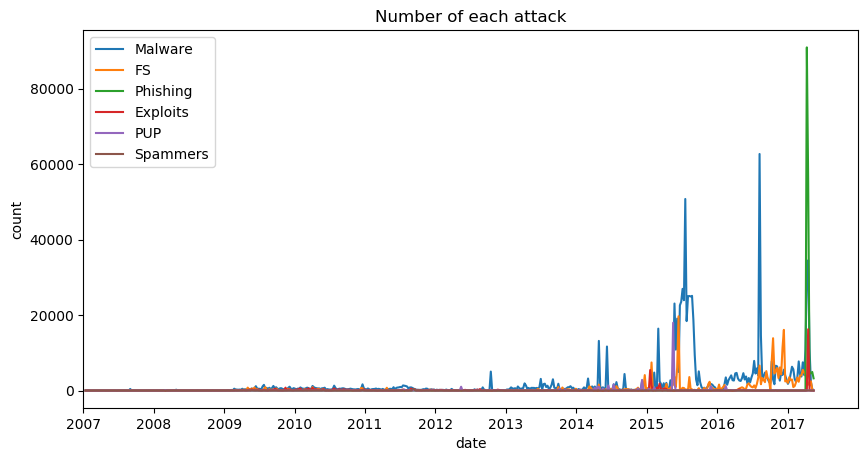

In [59]:
#　時系列順に各攻撃種別の発生件数を可視化する
plt.figure(figsize=(10, 5), dpi=100)
sxmin='2007-1-1'
sxmax='2017-12-31'
xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
plt.xlim([xmin,xmax])
plt.title("Number of each attack")
#tmp['total'] = tmp['is_malware'] + tmp['is_fs'] + tmp['is_phishing'] + tmp['is_exploit'] + tmp['is_pup'] + tmp['is_spammers']
for i, s in enumerate(li):
    plt.plot(tmp['is_' + s], label=names[i])
#plt.plot(tmp['total'], label='total')
plt.xlabel("date")
plt.ylabel("count")
plt.legend()

In [60]:
def show_number_of_attack(label):
    plt.figure(figsize=(10, 5), dpi=100)
    sxmin='2007-1-1'
    sxmax='2017-12-31'
    xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
    xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
    plt.xlim([xmin,xmax])
    plt.title("Number of " + names[label])
    #tmp['total'] = tmp['is_malware'] + tmp['is_fs'] + tmp['is_phishing'] + tmp['is_exploit'] + tmp['is_pup'] + tmp['is_spammers']
    plt.plot(tmp['is_' + li[label]], label=names[label])
    #plt.plot(tmp['total'], label='total')
    plt.xlabel("date")
    plt.ylabel("count")
    plt.legend()

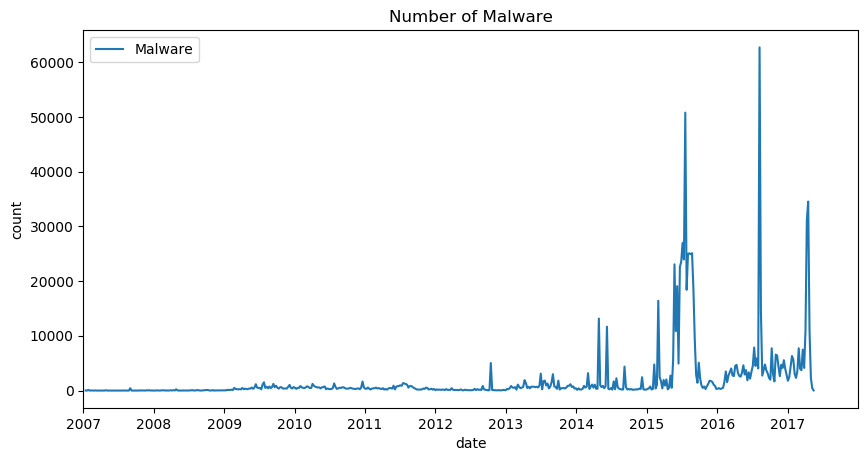

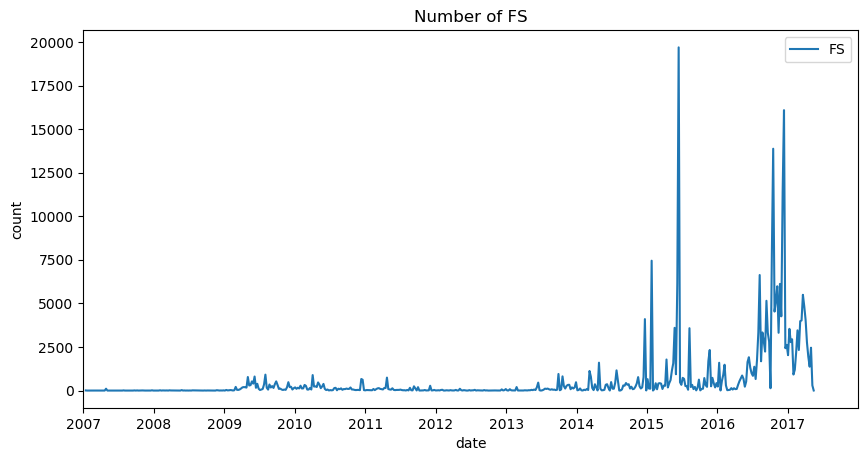

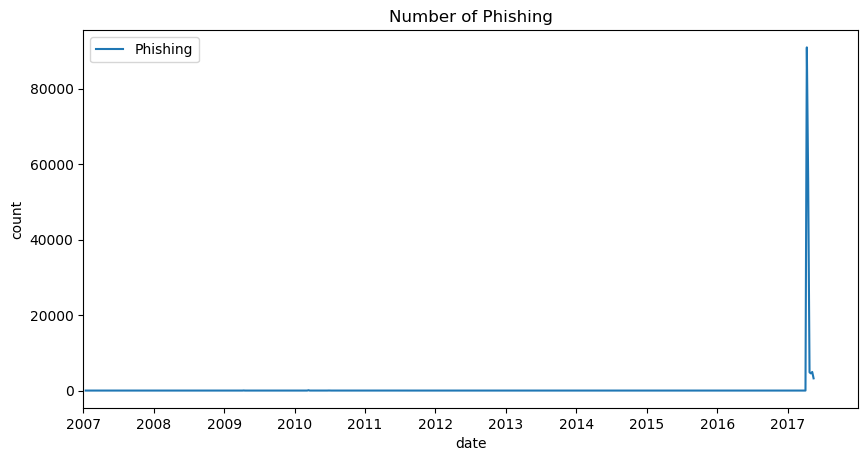

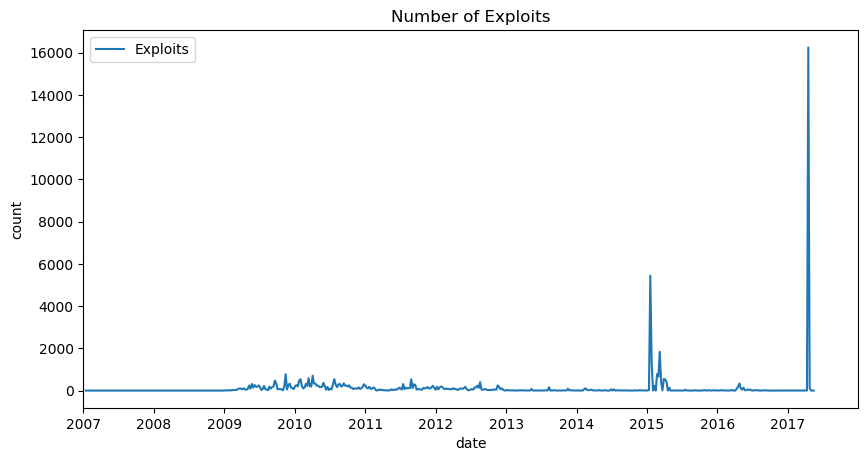

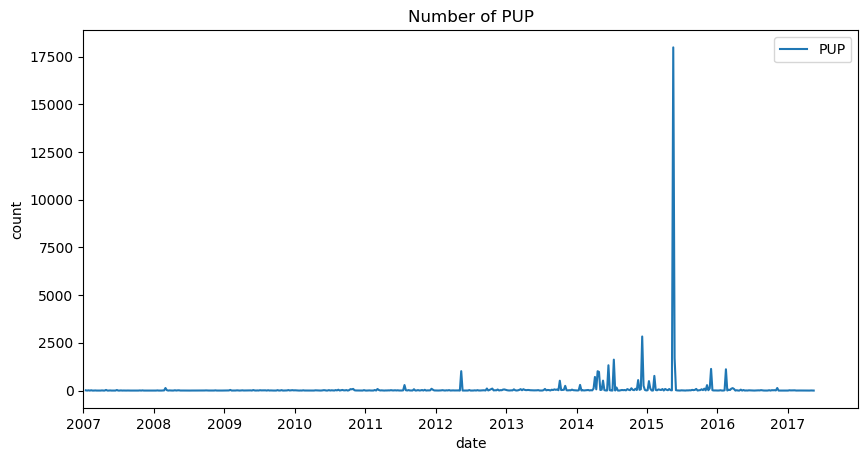

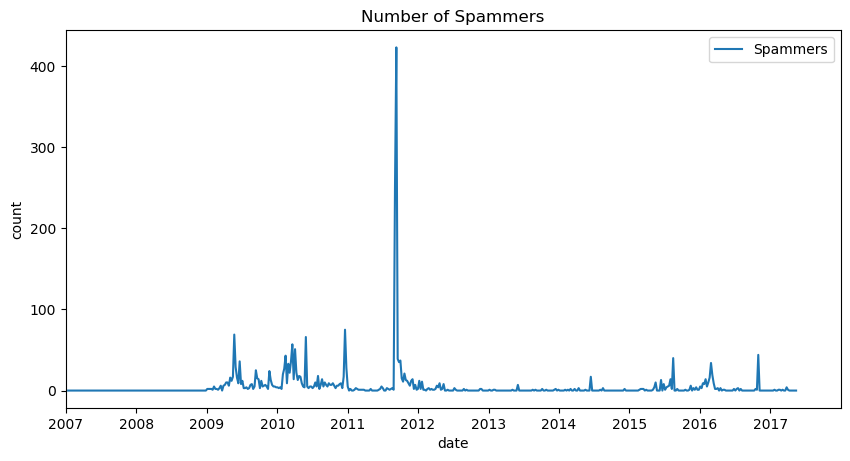

In [61]:
# 各攻撃種別の発生件数の可視化
for label in range(6):
    show_number_of_attack(label)

In [62]:
data_dummy = pd.get_dummies(data['day_of_week'])
data = pd.concat([data, data_dummy],axis=1)
data

,IP,CC,ASN,domain,organization,day,month,year,blacklist_source,label,...,is_exploit,is_pup,is_spammers,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
date,,,,,,,,,,,,,,,,,,,,,
2014-08-14,147.255.183.98,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,0,0,0,0,0,0,0,1,0,0
2014-08-14,173.234.122.146,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,0,0,0,0,0,0,0,1,0,0
2014-08-14,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,0,0,0,0,0,0,0,1,0,0
2014-08-14,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,0,0,0,0,0,0,0,1,0,0
2014-08-14,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-11,92.240.253.3,SK,42005,arttoday.sk,LIGHTSTORM-COMMUNICATIONS-SRO-SK-AS LightStorm...,11,12,2015,ransometracker,spammers,...,0,0,1,1,0,0,0,0,0,0
2016-02-25,93.118.36.235,RO,48881,recaswine.ro,DATA-NODE-AS DATA NODE SRL,25,2,2016,ransometracker,spammers,...,0,0,1,0,0,0,0,1,0,0
2016-03-12,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,...,0,0,1,0,0,1,0,0,0,0


In [63]:
# IPアドレスをビット表現にして各ビットを特徴量として追加
def ip_bit_map(ip, bit):
    if '.' in ip:
        li = ip.split('.')
    else:
        li = ip.split('-')
    sec = -1
    if 0 <= bit <= 7:
        sec = 3
    elif 8 <= bit <= 15:
        sec = 2
    elif 16 <= bit <= 23:
        sec = 1
    elif 24 <= bit <= 31:
        sec = 0
    res = int(li[sec])
    res = res >> (bit % 8)
    return  res & 1

for i in range(32)[::-1]:
    data['IP_' + str(i) + 'bit'] = data['IP'].map(lambda x: ip_bit_map(x, i))

In [64]:
# ASNをビット表現にして各ビットを特徴量として追加
def asn_bit_map(asn, bit):
    res = asn >> bit
    return  res & 1

for i in range(32)[::-1]:
    data['ASN_' + str(i) + 'bit'] = data['ASN'].map(lambda x: asn_bit_map(x, i))

In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['organization'] = data['organization'].astype('str')
le.fit(data['organization'])
data['encoded_organization'] = le.transform(data['organization'])

data

,IP,CC,ASN,domain,organization,day,month,year,blacklist_source,label,...,ASN_8bit,ASN_7bit,ASN_6bit,ASN_5bit,ASN_4bit,ASN_3bit,ASN_2bit,ASN_1bit,ASN_0bit,encoded_organization
date,,,,,,,,,,,,,,,,,,,,,
2014-08-14,147.255.183.98,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,0,1,0,0,1,1,0,1,1,8728
2014-08-14,173.234.122.146,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,0,1,0,0,1,1,0,1,1,8728
2014-08-14,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,0,1,0,0,1,1,0,1,1,8728
2014-08-14,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,0,1,0,0,1,1,0,1,1,8728
2014-08-14,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,0,1,0,0,1,1,0,1,1,8728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-11,92.240.253.3,SK,42005,arttoday.sk,LIGHTSTORM-COMMUNICATIONS-SRO-SK-AS LightStorm...,11,12,2015,ransometracker,spammers,...,0,0,0,0,1,0,1,0,1,7188
2016-02-25,93.118.36.235,RO,48881,recaswine.ro,DATA-NODE-AS DATA NODE SRL,25,2,2016,ransometracker,spammers,...,0,1,1,1,1,0,0,0,1,3290
2016-03-12,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,...,1,0,0,1,1,1,0,1,1,2542


In [66]:
print([x for x in set(list(data.columns)) if list(data.columns).count(x) > 1])

[]


In [67]:
data['calc_date'] = data['year'] * 10000 + data['month'] * 100 + data['day']
data

,IP,CC,ASN,domain,organization,day,month,year,blacklist_source,label,...,ASN_7bit,ASN_6bit,ASN_5bit,ASN_4bit,ASN_3bit,ASN_2bit,ASN_1bit,ASN_0bit,encoded_organization,calc_date
date,,,,,,,,,,,,,,,,,,,,,
2014-08-14,147.255.183.98,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,1,0,0,1,1,0,1,1,8728,20140814
2014-08-14,173.234.122.146,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,1,0,0,1,1,0,1,1,8728,20140814
2014-08-14,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,1,0,0,1,1,0,1,1,8728,20140814
2014-08-14,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,1,0,0,1,1,0,1,1,8728,20140814
2014-08-14,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,1,0,0,1,1,0,1,1,8728,20140814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-11,92.240.253.3,SK,42005,arttoday.sk,LIGHTSTORM-COMMUNICATIONS-SRO-SK-AS LightStorm...,11,12,2015,ransometracker,spammers,...,0,0,0,1,0,1,0,1,7188,20151211
2016-02-25,93.118.36.235,RO,48881,recaswine.ro,DATA-NODE-AS DATA NODE SRL,25,2,2016,ransometracker,spammers,...,1,1,1,1,0,0,0,1,3290,20160225
2016-03-12,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,...,0,0,1,1,1,0,1,1,2542,20160312


In [68]:
data.columns

Index(['IP', 'CC', 'ASN', 'domain', 'organization', 'day', 'month', 'year',
       'blacklist_source', 'label', 'encoded_label', 'IP_length',
       'IP_bits(0-7)', 'IP_bits(8-15)', 'IP_bits(16-23)', 'IP_bits(24-31)',
       'organization_length', 'IP_class', 'date', 'day_of_week', 'is_malware',
       'is_fs', 'is_phishing', 'is_exploit', 'is_pup', 'is_spammers', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'IP_31bit', 'IP_30bit', 'IP_29bit', 'IP_28bit', 'IP_27bit', 'IP_26bit',
       'IP_25bit', 'IP_24bit', 'IP_23bit', 'IP_22bit', 'IP_21bit', 'IP_20bit',
       'IP_19bit', 'IP_18bit', 'IP_17bit', 'IP_16bit', 'IP_15bit', 'IP_14bit',
       'IP_13bit', 'IP_12bit', 'IP_11bit', 'IP_10bit', 'IP_9bit', 'IP_8bit',
       'IP_7bit', 'IP_6bit', 'IP_5bit', 'IP_4bit', 'IP_3bit', 'IP_2bit',
       'IP_1bit', 'IP_0bit', 'ASN_31bit', 'ASN_30bit', 'ASN_29bit',
       'ASN_28bit', 'ASN_27bit', 'ASN_26bit', 'ASN_25bit', 'ASN_24bit',
       'ASN_23bit', '

In [69]:
duplicate_columns = data.columns[data.columns.duplicated()]
duplicate_columns

Index([], dtype='object')

In [70]:
data = data.loc[:,~data.columns.duplicated()]

In [71]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)
data.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in data.columns.values]

In [72]:
print([x for x in set(list(data.columns)) if list(data.columns).count(x) > 1])

[]


In [73]:
data.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in data.columns]

In [74]:
data = data.reset_index(drop=True)
data

,IP,CC,ASN,domain,organization,day,month,year,blacklist_source,label,...,ASN_7bit,ASN_6bit,ASN_5bit,ASN_4bit,ASN_3bit,ASN_2bit,ASN_1bit,ASN_0bit,encoded_organization,calc_date
0,147.255.183.98,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,1,0,0,1,1,0,1,1,8728,20140814
1,173.234.122.146,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,1,0,0,1,1,0,1,1,8728,20140814
2,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,1,0,0,1,1,0,1,1,8728,20140814
3,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,1,0,0,1,1,0,1,1,8728,20140814
4,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,1,0,0,1,1,0,1,1,8728,20140814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574390,92.240.253.3,SK,42005,arttoday.sk,LIGHTSTORM-COMMUNICATIONS-SRO-SK-AS LightStorm...,11,12,2015,ransometracker,spammers,...,0,0,0,1,0,1,0,1,7188,20151211
1574391,93.118.36.235,RO,48881,recaswine.ro,DATA-NODE-AS DATA NODE SRL,25,2,2016,ransometracker,spammers,...,1,1,1,1,0,0,0,1,3290,20160225
1574392,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,...,0,0,1,1,1,0,1,1,2542,20160312
1574393,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,...,0,0,1,1,1,0,1,1,2542,20160312


# モデル構築

## ロジスティック回帰
- メモリの関係からOrganizationをOne-hot-encodingすると学習できないので特徴量から除く

In [75]:
import copy

data2 = copy.deepcopy(data)

In [76]:
# Countryをone-hot-encodingする
data_dummy = pd.get_dummies(data2['CC'], drop_first=True)
data3 = pd.concat([data2, data_dummy], axis=1)
data3

,IP,CC,ASN,domain,organization,day,month,year,blacklist_source,label,...,VG,VN,VU,XK,YE,ZA,ZM,ZW,ZZ,xx
0,147.255.183.98,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,0,0,0,0,0,0,0,0,0,0
1,173.234.122.146,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,0,0,0,0,0,0,0,0,0,0
2,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,0,0,0,0,0,0,0,0,0,0
3,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,0,0,0,0,0,0,0,0,0,0
4,173.234.142.186,US,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574390,92.240.253.3,SK,42005,arttoday.sk,LIGHTSTORM-COMMUNICATIONS-SRO-SK-AS LightStorm...,11,12,2015,ransometracker,spammers,...,0,0,0,0,0,0,0,0,0,0
1574391,93.118.36.235,RO,48881,recaswine.ro,DATA-NODE-AS DATA NODE SRL,25,2,2016,ransometracker,spammers,...,0,0,0,0,0,0,0,0,0,0
1574392,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,...,0,0,0,0,0,0,0,0,0,0
1574393,94.73.150.190,TR,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,...,0,0,0,0,0,0,0,0,0,0


In [77]:
X = data3.drop(columns=['IP','CC', 'day_of_week','domain', 'organization', 'blacklist_source', 'label', 'encoded_label', 'is_malware', 'is_fs', 'is_phishing', 'is_exploit',
                                     'is_pup', 'is_spammers', 'date', 'encoded_organization'], inplace=False)
y = data3['encoded_label']

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import gc

X_train, X_test, y_train, y_test = train_test_split(
                     X, y, test_size=0.6, random_state=0, stratify=y)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [79]:
gc.collect()
# 説明用に学習データとテストデータの元の状態を保存しておく
train_x_saved = X_train.copy()
test_x_saved = X_test.copy()

In [80]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 標準化を行った学習データとテストデータを返す関数
def load_standarized_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()
    scaler = StandardScaler()
    scaler.fit(train_x)
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)
    return pd.DataFrame(train_x), pd.DataFrame(test_x)

In [81]:
train_x, test_x = load_standarized_data()

In [82]:
from sklearn.metrics import precision_score

model = LogisticRegression()
model.fit(train_x, y_train)
y_pred = model.predict(test_x)
accuracy = precision_score(y_test, y_pred, average='weighted')
print(accuracy)

0.7416982279135528


- 多重共線性を考慮したのでスライドの値より多少改善した

## ニューラルネット
- これもOrganizationを特徴量として除く

In [83]:
from keras.utils import np_utils

y = np_utils.to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(
                     X, y, test_size=0.6, random_state=0, stratify=y)
train_x_saved = X_train.copy()
test_x_saved = X_test.copy()

Using TensorFlow backend.


In [84]:
# tensorflowの警告抑制
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# -----------------------------------
# ニューラルネットの実装
# -----------------------------------
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, make_scorer
# データのスケーリング
train_x, test_x =load_standarized_data()

# ニューラルネットモデルの構築
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=279))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

def mean_pred(y_true, y_pred):
    return precision_score(y_true, y_pred, average='weighted')

from keras.callbacks import EarlyStopping

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', metrics=['categorical_accuracy'])




# 学習の実行
# バリデーションデータもモデルに渡し、学習の進行とともにスコアがどう変わるかモニタリングする
batch_size = 128
epochs = 50
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(train_x, y_train ,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(test_x, y_test), callbacks=[early_stopping])

Train on 629758 samples, validate on 944637 samples
Epoch 1/50
629758/629758 [==============================] - 50s 79us/step - loss: 0.5144 - categorical_accuracy: 0.8008 - val_loss: 0.4040 - val_categorical_accuracy: 0.8434
Epoch 2/50
629758/629758 [==============================] - 54s 85us/step - loss: 0.4458 - categorical_accuracy: 0.8362 - val_loss: 0.3867 - val_categorical_accuracy: 0.8565
Epoch 3/50
629758/629758 [==============================] - 53s 84us/step - loss: 0.4475 - categorical_accuracy: 0.8435 - val_loss: 0.3910 - val_categorical_accuracy: 0.8551
Epoch 4/50
629758/629758 [==============================] - 45s 71us/step - loss: 0.4681 - categorical_accuracy: 0.8465 - val_loss: 0.3881 - val_categorical_accuracy: 0.8601
Epoch 5/50
629758/629758 [==============================] - 54s 86us/step - loss: 0.4967 - categorical_accuracy: 0.8473 - val_loss: 0.3717 - val_categorical_accuracy: 0.8602
Epoch 6/50
629758/629758 [==============================] - 51s 81us/step - lo

In [85]:
_, true_label = np.where(y_test > 0) 
# バリデーションデータでのスコアの確認
y_pred = np.argmax(model.predict(test_x), axis=1)
score = precision_score(true_label, y_pred, average='weighted')
print(f'score: {score:.7f}')

score: 0.8589917


## ランダムフォレスト 

In [86]:
# Countryをone-hot-encodingする
data_dummy = pd.get_dummies(data2['CC'])
data2 = pd.concat([data2.drop(['CC'], axis=1), data_dummy], axis=1)
data2

,IP,ASN,domain,organization,day,month,year,blacklist_source,label,encoded_label,...,VG,VN,VU,XK,YE,ZA,ZM,ZW,ZZ,xx
0,147.255.183.98,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,...,0,0,0,0,0,0,0,0,0,0
1,173.234.122.146,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,...,0,0,0,0,0,0,0,0,0,0
2,173.234.142.186,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,...,0,0,0,0,0,0,0,0,0,0
3,173.234.142.186,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,...,0,0,0,0,0,0,0,0,0,0
4,173.234.142.186,15003,NaN,"NOBIS-TECH - Nobis Technology Group, LLC",14,8,2014,dyre_ssl,malware,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574390,92.240.253.3,42005,arttoday.sk,LIGHTSTORM-COMMUNICATIONS-SRO-SK-AS LightStorm...,11,12,2015,ransometracker,spammers,5,...,0,0,0,0,0,0,0,0,0,0
1574391,93.118.36.235,48881,recaswine.ro,DATA-NODE-AS DATA NODE SRL,25,2,2016,ransometracker,spammers,5,...,0,0,0,0,0,0,0,0,0,0
1574392,94.73.150.190,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,5,...,0,0,0,0,0,0,0,0,0,0
1574393,94.73.150.190,34619,neyenirneicilir.com,CIZGI CIZGI TELEKOMUNIKASYON ANONIM SIRKETI,12,3,2016,ransometracker,spammers,5,...,0,0,0,0,0,0,0,0,0,0


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score

def do_random_forest(rs, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(
                         X, y, test_size=0.6, random_state=rs, stratify=y)
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    i = 1
    # 層化5分割でランダムフォレストで学習
    for train_index, test_index in StratifiedKFold(n_splits=5, random_state=0, shuffle=True).split(X_train, y_train):
        clf = RandomForestClassifier(random_state=0)
        X_train2, y_train2 = X_train.loc[train_index, :], y_train[train_index]
        clf.fit(X_train2, y_train2)
        if i == 1:
            clf1 = clf
        elif i == 2:
            clf2 = clf
        elif i == 3:
            clf3 = clf
        elif i == 4:
            clf4 = clf
        elif i == 5:
            clf5 = clf
        i += 1
    # データ数が多いのでtestを10分割して予測する
    N_split = 10
    split_data = np.array_split(X_test, N_split)
    y_pred1_proba_tmp = []
    y_pred2_proba_tmp = []
    y_pred3_proba_tmp = []
    y_pred4_proba_tmp = []
    y_pred5_proba_tmp = []
    for data in split_data:
        y_pred1_proba_tmp.append(clf1.predict_proba(data))
        y_pred2_proba_tmp.append(clf2.predict_proba(data))
        y_pred3_proba_tmp.append(clf3.predict_proba(data))
        y_pred4_proba_tmp.append(clf4.predict_proba(data))
        y_pred5_proba_tmp.append(clf5.predict_proba(data))

    y_pred1_proba = np.concatenate(y_pred1_proba_tmp)
    y_pred2_proba = np.concatenate(y_pred2_proba_tmp)
    y_pred3_proba = np.concatenate(y_pred3_proba_tmp)
    y_pred4_proba = np.concatenate(y_pred4_proba_tmp)
    y_pred5_proba = np.concatenate(y_pred5_proba_tmp)
    y_pred_proba_avg = np.array([y_pred1_proba, y_pred2_proba, y_pred3_proba, y_pred4_proba, y_pred5_proba]).mean(axis=0)
    y_pred = np.argmax(y_pred_proba_avg, axis=1)
    accuracy = precision_score(y_test, y_pred, average='weighted')
    print(f'random_state={rs}のとき')
    print(f'正解率:{accuracy}')
    
    plt.figure(figsize=(7, 50))
    feature = clf1.feature_importances_
    #特徴量の名前
    label = X_train.columns[0:]
    #特徴量の重要度順(降順)
    indices = np.argsort(feature)[::1]

    # プロット
    x = range(len(feature))
    y = feature[indices]
    y_label = label[indices]
    plt.barh(x, y, align = 'center')
    plt.yticks(x, y_label)
    plt.xlabel("importance_num")
    plt.ylabel("feature")
    plt.show()

- 全ての特徴量を使った場合

random_state=0のとき
正解率:0.9284529261365227


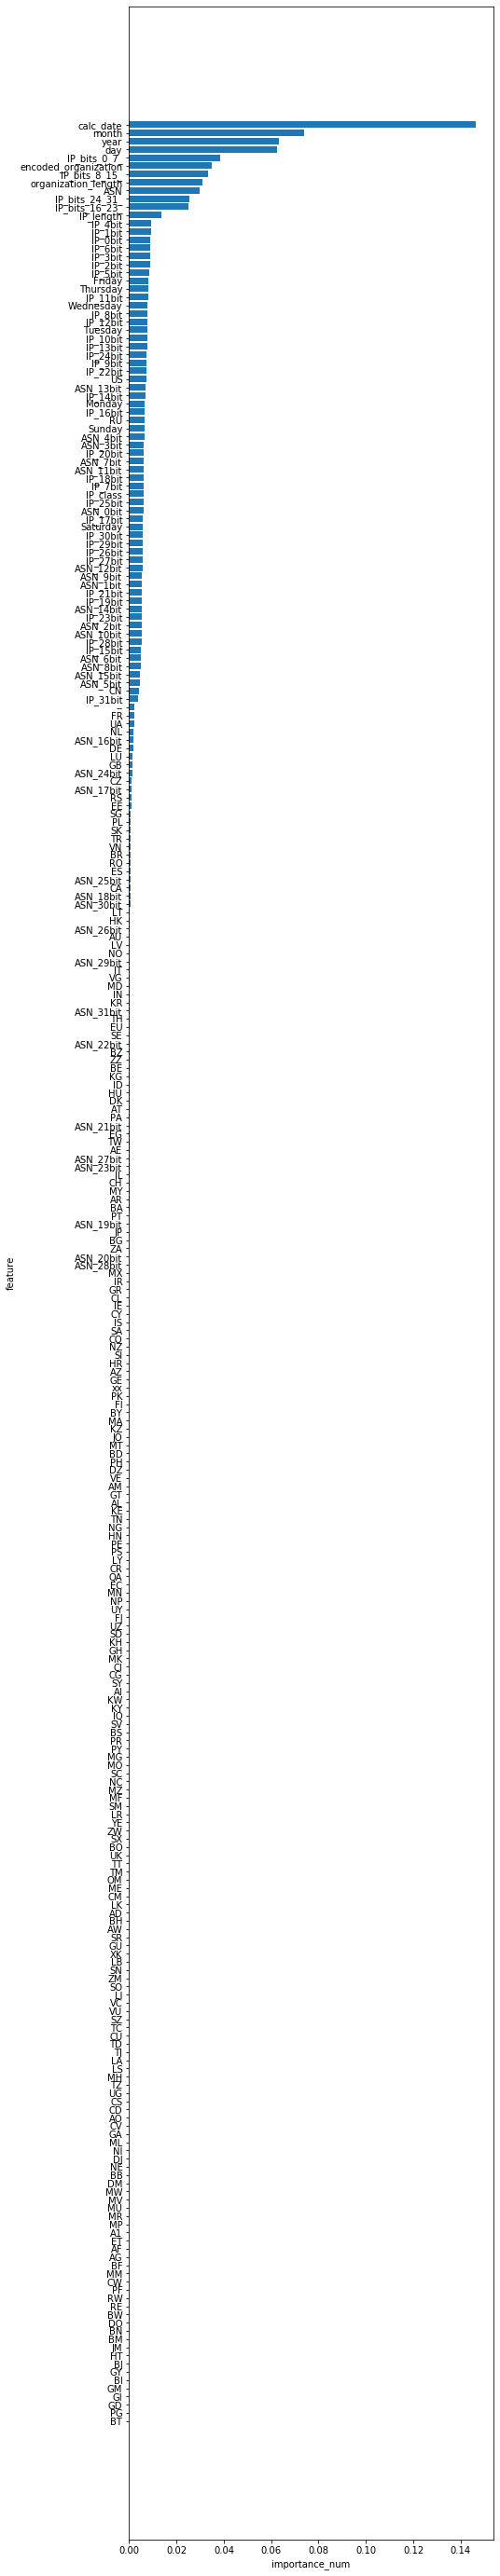

In [88]:
X = data2.drop(columns=['IP','domain', 'day_of_week', 'organization', 'blacklist_source', 'label', 'encoded_label', 'is_malware', 'is_fs', 'is_phishing', 'is_exploit',
                                     'is_pup', 'is_spammers', 'date'], inplace=False)
y = data2['encoded_label']

do_random_forest(0, X, y)

- 特徴量から曜日、IP_length、IPアドレスおよびASのbit表現を取り除いた場合

random_state=0のとき
正解率:0.9311176701372358


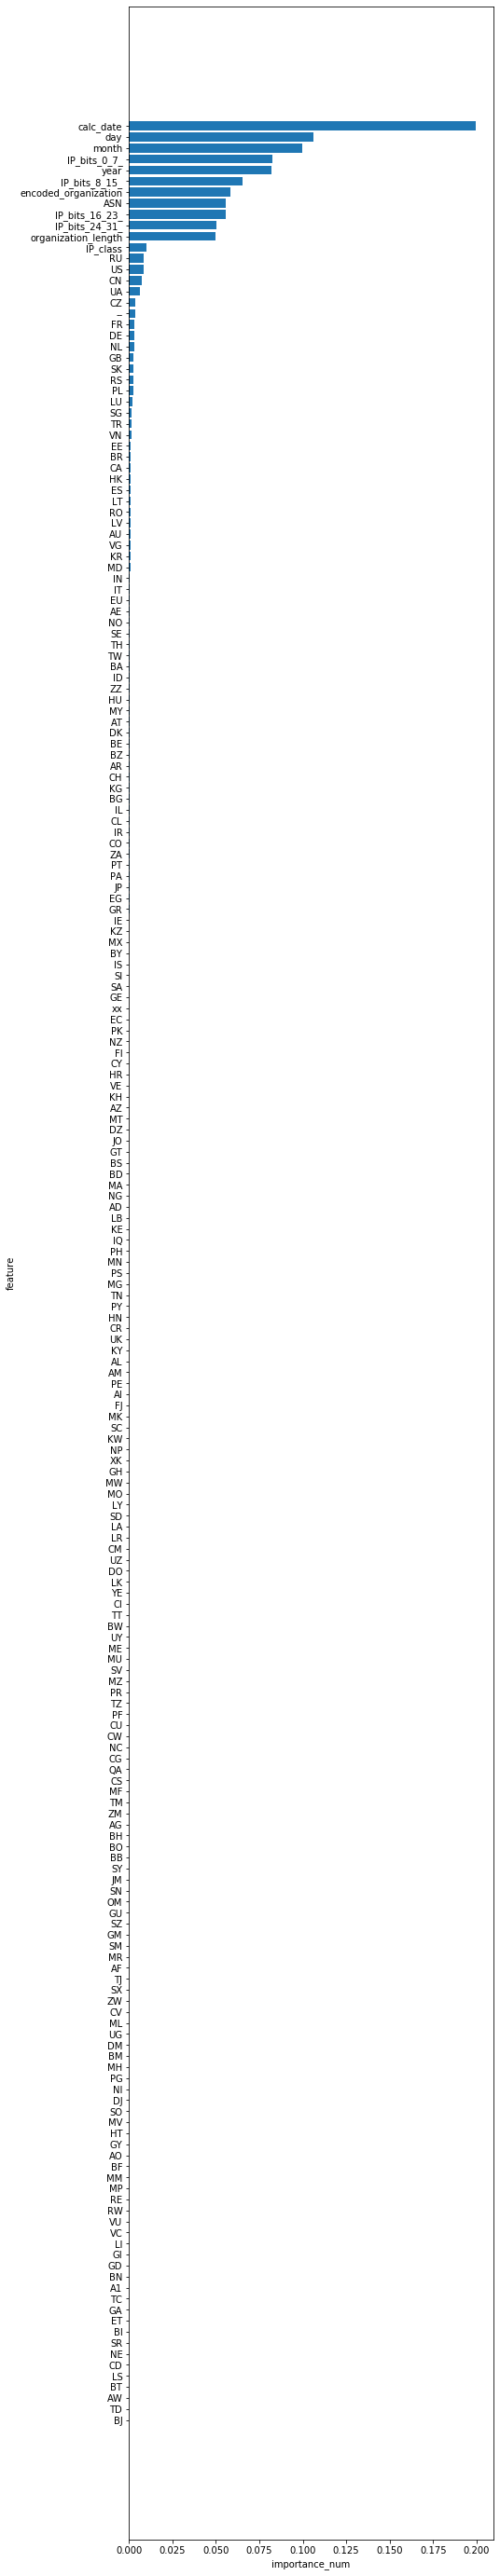

In [89]:
X = data2.drop(columns=['IP','domain','day_of_week', 'organization', 'blacklist_source', 'label', 'encoded_label', 'is_malware', 'is_fs', 'is_phishing', 'is_exploit',
                                     'is_pup', 'is_spammers', 'date', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'IP_31bit', 'IP_30bit', 'IP_29bit', 'IP_28bit',
       'IP_27bit', 'IP_26bit', 'IP_25bit', 'IP_24bit', 'IP_23bit', 'IP_22bit',
       'IP_21bit', 'IP_20bit', 'IP_19bit', 'IP_18bit', 'IP_17bit', 'IP_16bit',
       'IP_15bit', 'IP_14bit', 'IP_13bit', 'IP_12bit', 'IP_11bit', 'IP_10bit',
       'IP_9bit', 'IP_8bit', 'IP_7bit', 'IP_6bit', 'IP_5bit', 'IP_4bit',
       'IP_3bit', 'IP_2bit', 'IP_1bit', 'IP_0bit', 'ASN_31bit', 'ASN_30bit',
       'ASN_29bit', 'ASN_28bit', 'ASN_27bit', 'ASN_26bit', 'ASN_25bit',
       'ASN_24bit', 'ASN_23bit', 'ASN_22bit', 'ASN_21bit', 'ASN_20bit',
       'ASN_19bit', 'ASN_18bit', 'ASN_17bit', 'ASN_16bit', 'ASN_15bit',
       'ASN_14bit', 'ASN_13bit', 'ASN_12bit', 'ASN_11bit', 'ASN_10bit',
       'ASN_9bit', 'ASN_8bit', 'ASN_7bit', 'ASN_6bit', 'ASN_5bit', 'ASN_4bit',
       'ASN_3bit', 'ASN_2bit', 'ASN_1bit', 'ASN_0bit', 'IP_length'], inplace=False)
y = data2['encoded_label']

do_random_forest(0, X, y)

## lightgbm

In [90]:
X = data2.drop(columns=['IP','domain', 'day_of_week', 'organization', 'blacklist_source', 'label', 'encoded_label', 'is_malware', 'is_fs', 'is_phishing', 'is_exploit',
                                     'is_pup', 'is_spammers', 'date'], inplace=False)
y = data2['encoded_label']

X_train, X_test, y_train, y_test = train_test_split(
                         X, y, test_size=0.6, random_state=0, stratify=y)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

### optunaによるパラメータ探索
- ここでは時間の都合上n_trials=5とするが、実際はxgboost、lightgbmはn_trials=100、
  catboostはn_trails=50で行った
- 毎回求めた値は変わる可能性がある

In [91]:
import lightgbm as lgb
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
import optuna

tmp = X_test

train_data = lgb.Dataset(X_train, label=y_train)
eval_data = lgb.Dataset(X_test, label=y_test, reference= train_data)

def objective(trial):
    
    lgb_train = lgb.Dataset(X_train, y_train)
    
    params = {
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_class': 6,
        'num_threads' :5,
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 1500, 4096),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
    # 学習する
    model = lgb.train(params, train_data,
                                    valid_sets=eval_data,
                                    num_boost_round=2000,
                                    early_stopping_rounds=50,
                                    verbose_eval=50)

    y_pred = np.argmax(model.predict(tmp), axis=1)
    accuracy = precision_score(y_test, y_pred, average='weighted')
    return accuracy


if __name__ == '__main__':
    study = optuna.create_study(direction='maximize')
    #ここをn_trials=100に変更する
    study.optimize(objective, n_trials=5, n_jobs=1)

    print('Number of finished trials: {}'.format(len(study.trials)))

    print('Best trial:')
    trial = study.best_trial

    print('  Value: {}'.format(trial.value))

    print('  Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

Training until validation scores don't improve for 50 rounds
[50]	valid_0's multi_logloss: 0.188303
[100]	valid_0's multi_logloss: 0.169188
Early stopping, best iteration is:
[98]	valid_0's multi_logloss: 0.169141


[I 2020-02-19 07:56:14,731] Finished trial#0 resulted in value: 0.9365541004154639. Current best value is 0.9365541004154639 with parameters: {'lambda_l1': 4.577920064279952e-08, 'lambda_l2': 0.20872945597586423, 'num_leaves': 3150, 'feature_fraction': 0.8779477220720919, 'bagging_fraction': 0.7478121125748861, 'bagging_freq': 2, 'min_child_samples': 37}.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's multi_logloss: 0.22248
[100]	valid_0's multi_logloss: 0.296811
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.213187


[I 2020-02-19 07:59:30,942] Finished trial#1 resulted in value: 0.9272621883130142. Current best value is 0.9365541004154639 with parameters: {'lambda_l1': 4.577920064279952e-08, 'lambda_l2': 0.20872945597586423, 'num_leaves': 3150, 'feature_fraction': 0.8779477220720919, 'bagging_fraction': 0.7478121125748861, 'bagging_freq': 2, 'min_child_samples': 37}.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's multi_logloss: 0.217637
[100]	valid_0's multi_logloss: 0.182214
[150]	valid_0's multi_logloss: 0.172262
[200]	valid_0's multi_logloss: 0.168918
[250]	valid_0's multi_logloss: 0.168529
Early stopping, best iteration is:
[231]	valid_0's multi_logloss: 0.168406


[I 2020-02-19 08:05:39,092] Finished trial#2 resulted in value: 0.9367330761330429. Current best value is 0.9367330761330429 with parameters: {'lambda_l1': 9.421387974775456e-07, 'lambda_l2': 3.0365677251485153, 'num_leaves': 1553, 'feature_fraction': 0.48840365414626274, 'bagging_fraction': 0.576764520302537, 'bagging_freq': 5, 'min_child_samples': 12}.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's multi_logloss: 0.219953
[100]	valid_0's multi_logloss: 0.185381
[150]	valid_0's multi_logloss: 0.175213
[200]	valid_0's multi_logloss: 0.171108
[250]	valid_0's multi_logloss: 0.169493
[300]	valid_0's multi_logloss: 0.169115
[350]	valid_0's multi_logloss: 0.169143
Early stopping, best iteration is:
[322]	valid_0's multi_logloss: 0.169018


[I 2020-02-19 08:13:16,870] Finished trial#3 resulted in value: 0.9361468973298428. Current best value is 0.9367330761330429 with parameters: {'lambda_l1': 9.421387974775456e-07, 'lambda_l2': 3.0365677251485153, 'num_leaves': 1553, 'feature_fraction': 0.48840365414626274, 'bagging_fraction': 0.576764520302537, 'bagging_freq': 5, 'min_child_samples': 12}.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's multi_logloss: 0.220352
[100]	valid_0's multi_logloss: 0.183366
[150]	valid_0's multi_logloss: 0.398787
Early stopping, best iteration is:
[124]	valid_0's multi_logloss: 0.17834


[I 2020-02-19 08:17:18,524] Finished trial#4 resulted in value: 0.9317079707568846. Current best value is 0.9367330761330429 with parameters: {'lambda_l1': 9.421387974775456e-07, 'lambda_l2': 3.0365677251485153, 'num_leaves': 1553, 'feature_fraction': 0.48840365414626274, 'bagging_fraction': 0.576764520302537, 'bagging_freq': 5, 'min_child_samples': 12}.


Number of finished trials: 5
Best trial:
  Value: 0.9367330761330429
  Params: 
    lambda_l1: 9.421387974775456e-07
    lambda_l2: 3.0365677251485153
    num_leaves: 1553
    feature_fraction: 0.48840365414626274
    bagging_fraction: 0.576764520302537
    bagging_freq: 5
    min_child_samples: 12


In [92]:
lgb_params = {
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_class': 6,
        'num_threads' :5,
}
lgb_params.update(**trial.params)
lgb_params

{'objective': 'multiclass',
 'metric': 'multi_logloss',
 'verbosity': -1,
 'boosting_type': 'gbdt',
 'num_class': 6,
 'num_threads': 5,
 'lambda_l1': 9.421387974775456e-07,
 'lambda_l2': 3.0365677251485153,
 'num_leaves': 1553,
 'feature_fraction': 0.48840365414626274,
 'bagging_fraction': 0.576764520302537,
 'bagging_freq': 5,
 'min_child_samples': 12}

In [93]:
#　得られたパラメータの値(n_trials=100で得られたものi9)
lgb_params = {
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_class': 6,
        'num_threads' :5,
        'lambda_l1': 2.2086677914013376e-06, 
        'lambda_l2': 4.4108778786117435, 
        'num_leaves': 3028, 
        'feature_fraction': 0.4166780247209261,
        'bagging_fraction': 0.9765522862335396, 
        'bagging_freq': 4, 
        'min_child_samples': 33
}

In [94]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
eval_data = lgb.Dataset(X_test, label=y_test, reference= train_data)

lgb_model = lgb.train(lgb_params, train_data,
                                    valid_sets=eval_data,
                                    num_boost_round=2000,
                                    early_stopping_rounds=50,
                                    verbose_eval=10)

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.489077
[20]	valid_0's multi_logloss: 0.330953
[30]	valid_0's multi_logloss: 0.2631
[40]	valid_0's multi_logloss: 0.226963
[50]	valid_0's multi_logloss: 0.207169
[60]	valid_0's multi_logloss: 0.194071
[70]	valid_0's multi_logloss: 0.185532
[80]	valid_0's multi_logloss: 0.179732
[90]	valid_0's multi_logloss: 0.17517
[100]	valid_0's multi_logloss: 0.171726
[110]	valid_0's multi_logloss: 0.169178
[120]	valid_0's multi_logloss: 0.167137
[130]	valid_0's multi_logloss: 0.16567
[140]	valid_0's multi_logloss: 0.164668
[150]	valid_0's multi_logloss: 0.1638
[160]	valid_0's multi_logloss: 0.163199
[170]	valid_0's multi_logloss: 0.162853
[180]	valid_0's multi_logloss: 0.1627
[190]	valid_0's multi_logloss: 0.162717
[200]	valid_0's multi_logloss: 0.162797
[210]	valid_0's multi_logloss: 0.162971
[220]	valid_0's multi_logloss: 0.16323
[230]	valid_0's multi_logloss: 0.163515
Early stopping, best iteration is:
[1

In [95]:
y_pred = np.argmax(lgb_model.predict(X_test), axis=1)
accuracy = precision_score(y_test, y_pred, average='weighted')
print(accuracy)

0.9379419079291297


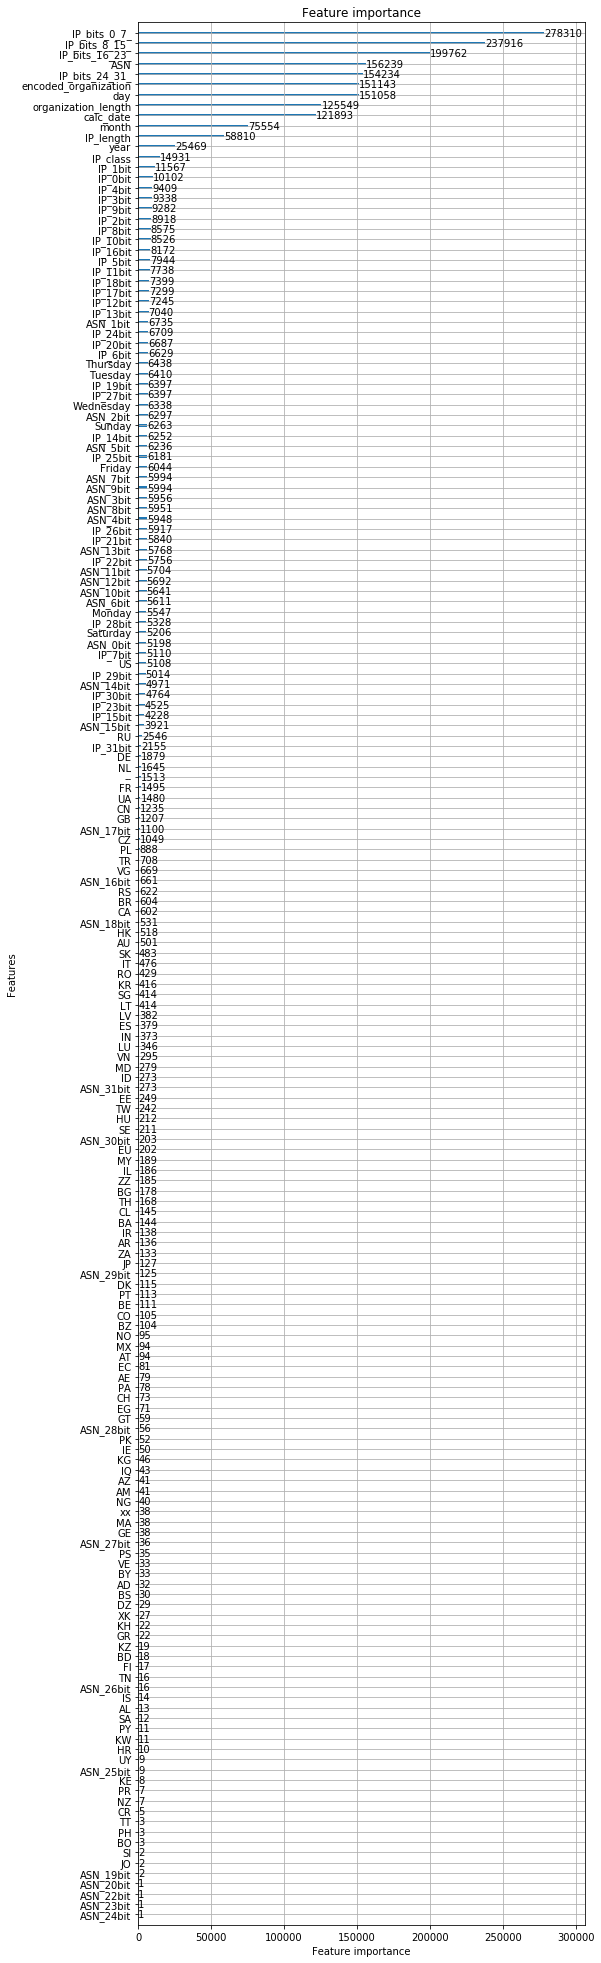

In [96]:
#　特徴量の重要度の可視化
lgb.plot_importance(lgb_model, figsize=(8, 35))

## xgboost

In [97]:
import xgboost as xgb

def objective(trial):
    
    params= {
        'objective': 'multiclass',
        'eval_metric': 'mlogloss',
        'num_class': 6,
        'nthread':5,
        'n_estimators':10000,
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 0.1, 10),
        'max_depth': trial.suggest_int('max_depth', 10, 50),
        'subsample': trial.suggest_uniform('subsample', 0.6, 0.95),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.95),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
         'alpha' : trial.suggest_loguniform('alpha', 1e-8, 1.0),
         'lambda' : trial.suggest_loguniform('lambda', 1e-6, 10.0),
    }
    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(X_train, y_train, verbose=50,
                             early_stopping_rounds=50, 
                             eval_set=[(X_test, y_test)])
    pred = xgb_model.predict(X_test)
    accuracy = precision_score(y_test, pred, average='weighted')
    return accuracy


if __name__ == '__main__':
    study = optuna.create_study(direction='maximize')
    #ここをn_trials=100に変更する
    study.optimize(objective, n_trials=5, n_jobs=1)

    print('Number of finished trials: {}'.format(len(study.trials)))

    print('Best trial:')
    trial = study.best_trial

    print('  Value: {}'.format(trial.value))

    print('  Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

[0]	validation_0-mlogloss:1.58104
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[50]	validation_0-mlogloss:0.196718
[100]	validation_0-mlogloss:0.16698
[150]	validation_0-mlogloss:0.169573
Stopping. Best iteration:
[108]	validation_0-mlogloss:0.166799



[I 2020-02-19 09:58:23,169] Finished trial#0 resulted in value: 0.9376159198935208. Current best value is 0.9376159198935208 with parameters: {'min_child_weight': 1.5179404608597005, 'max_depth': 44, 'subsample': 0.8342923930153358, 'colsample_bytree': 0.6898831383548415, 'gamma': 0.000226151285944539, 'alpha': 4.999832907163891e-08, 'lambda': 5.008373068182339e-06}.


[0]	validation_0-mlogloss:1.58665
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[50]	validation_0-mlogloss:0.206438
[100]	validation_0-mlogloss:0.175315
Stopping. Best iteration:
[91]	validation_0-mlogloss:0.175092



[I 2020-02-19 11:28:05,708] Finished trial#1 resulted in value: 0.9371564973523788. Current best value is 0.9376159198935208 with parameters: {'min_child_weight': 1.5179404608597005, 'max_depth': 44, 'subsample': 0.8342923930153358, 'colsample_bytree': 0.6898831383548415, 'gamma': 0.000226151285944539, 'alpha': 4.999832907163891e-08, 'lambda': 5.008373068182339e-06}.


[0]	validation_0-mlogloss:1.58409
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[50]	validation_0-mlogloss:0.233526
[100]	validation_0-mlogloss:0.171669
[150]	validation_0-mlogloss:0.169128
Stopping. Best iteration:
[137]	validation_0-mlogloss:0.168868



[I 2020-02-19 13:52:04,596] Finished trial#2 resulted in value: 0.9370625475285448. Current best value is 0.9376159198935208 with parameters: {'min_child_weight': 1.5179404608597005, 'max_depth': 44, 'subsample': 0.8342923930153358, 'colsample_bytree': 0.6898831383548415, 'gamma': 0.000226151285944539, 'alpha': 4.999832907163891e-08, 'lambda': 5.008373068182339e-06}.


[0]	validation_0-mlogloss:1.57237
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[50]	validation_0-mlogloss:0.223478
[100]	validation_0-mlogloss:0.175001
[150]	validation_0-mlogloss:0.177866
Stopping. Best iteration:
[101]	validation_0-mlogloss:0.174978



[I 2020-02-19 16:10:42,206] Finished trial#3 resulted in value: 0.9369702932052673. Current best value is 0.9376159198935208 with parameters: {'min_child_weight': 1.5179404608597005, 'max_depth': 44, 'subsample': 0.8342923930153358, 'colsample_bytree': 0.6898831383548415, 'gamma': 0.000226151285944539, 'alpha': 4.999832907163891e-08, 'lambda': 5.008373068182339e-06}.


[0]	validation_0-mlogloss:1.58356
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[50]	validation_0-mlogloss:0.209197
[100]	validation_0-mlogloss:0.168131
[150]	validation_0-mlogloss:0.164073
[200]	validation_0-mlogloss:0.165072
Stopping. Best iteration:
[161]	validation_0-mlogloss:0.163993



[I 2020-02-19 17:56:33,552] Finished trial#4 resulted in value: 0.9378817877490966. Current best value is 0.9378817877490966 with parameters: {'min_child_weight': 4.84190700810911, 'max_depth': 40, 'subsample': 0.8137499679537681, 'colsample_bytree': 0.663701210097753, 'gamma': 3.364282750043495e-05, 'alpha': 3.6062240348814725e-08, 'lambda': 0.03519905721622157}.


Number of finished trials: 5
Best trial:
  Value: 0.9378817877490966
  Params: 
    min_child_weight: 4.84190700810911
    max_depth: 40
    subsample: 0.8137499679537681
    colsample_bytree: 0.663701210097753
    gamma: 3.364282750043495e-05
    alpha: 3.6062240348814725e-08
    lambda: 0.03519905721622157


In [98]:
xgb_params = {
        'objective': 'multiclass',
        'eval_metric': 'mlogloss',
        'num_class': 6,
        'nthread':5,
        'n_estimators':10000,
}
xgb_params.update(**trial.params)
xgb_params

{'objective': 'multiclass',
 'eval_metric': 'mlogloss',
 'num_class': 6,
 'nthread': 5,
 'n_estimators': 10000,
 'min_child_weight': 4.84190700810911,
 'max_depth': 40,
 'subsample': 0.8137499679537681,
 'colsample_bytree': 0.663701210097753,
 'gamma': 3.364282750043495e-05,
 'alpha': 3.6062240348814725e-08,
 'lambda': 0.03519905721622157}

In [99]:
#　得られたパラメータの値(n_trials=100で得られたもの)
xgb_params = {
        'objective': 'multiclass',
        'eval_metric': 'mlogloss',
        'num_class': 6,
        'nthread':5,
        'n_estimators':10000,
         'min_child_weight': 1.1532937523721634,
         'max_depth': 29,
         'subsample': 0.8981736421493007, 
         'colsample_bytree': 0.6348337607190762,
         'gamma': 0.014803168572311178,
         'alpha': 0.000647260743734733, 
         'lambda': 4.161419436889356e-06
}

In [100]:
xgb_model = xgb.XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train, verbose=1,
                             early_stopping_rounds=50, 
                             eval_set=[(X_test, y_test)])

[0]	validation_0-mlogloss:1.60731
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:1.44403
[2]	validation_0-mlogloss:1.30063
[3]	validation_0-mlogloss:1.17334
[4]	validation_0-mlogloss:1.06883
[5]	validation_0-mlogloss:0.976349
[6]	validation_0-mlogloss:0.901858
[7]	validation_0-mlogloss:0.836661
[8]	validation_0-mlogloss:0.773796
[9]	validation_0-mlogloss:0.720329
[10]	validation_0-mlogloss:0.669937
[11]	validation_0-mlogloss:0.62776
[12]	validation_0-mlogloss:0.58726
[13]	validation_0-mlogloss:0.555266
[14]	validation_0-mlogloss:0.527015
[15]	validation_0-mlogloss:0.499957
[16]	validation_0-mlogloss:0.473896
[17]	validation_0-mlogloss:0.451964
[18]	validation_0-mlogloss:0.428732
[19]	validation_0-mlogloss:0.408684
[20]	validation_0-mlogloss:0.393915
[21]	validation_0-mlogloss:0.375662
[22]	validation_0-mlogloss:0.360109
[23]	validation_0-mlogloss:0.344267
[24]	validation_0-mlogloss:0.330558
[25]	validation_0-mlogloss:0.3186
[26]	validatio

XGBClassifier(alpha=0.000647260743734733, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.6348337607190762, eval_metric='mlogloss',
              gamma=0.014803168572311178, lambda=4.161419436889356e-06,
              learning_rate=0.1, max_delta_step=0, max_depth=29,
              min_child_weight=1.1532937523721634, missing=None,
              n_estimators=10000, n_jobs=1, nthread=5, num_class=6,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8981736421493007, verbosity=1)

In [101]:
pred = xgb_model.predict(X_test)
accuracy = precision_score(y_test, pred, average='weighted')
print(accuracy)

0.9377398502312878


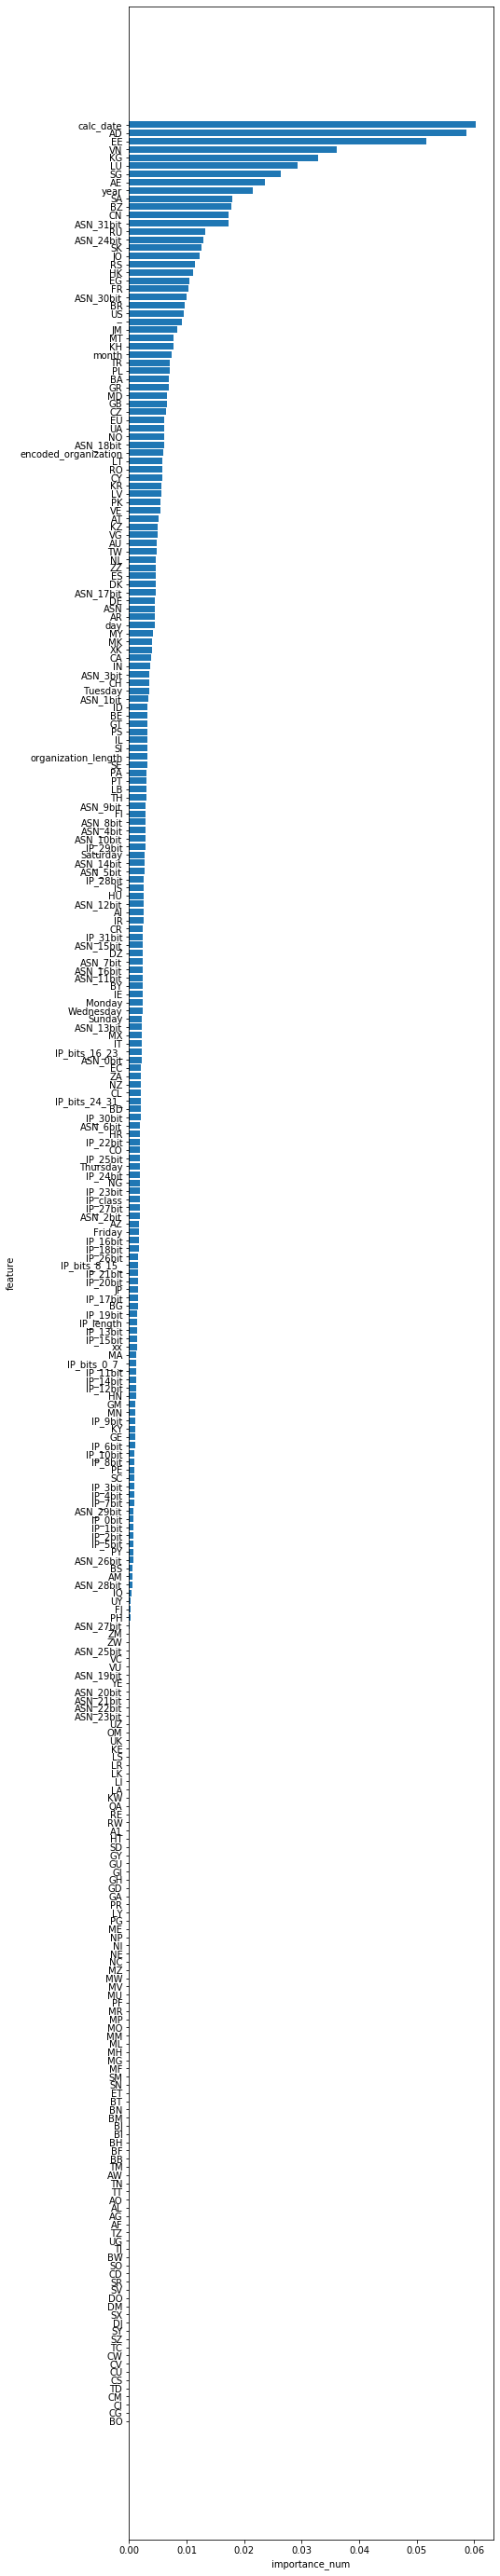

In [102]:
plt.figure(figsize=(7, 50))
feature = xgb_model.feature_importances_
#特徴量の名前
label = X_train.columns[0:]
#特徴量の重要度順(降順)
indices = np.argsort(feature)[::1]

# プロット
x = range(len(feature))
y = feature[indices]
y_label = label[indices]
plt.barh(x, y, align = 'center')
plt.yticks(x, y_label)
plt.xlabel("importance_num")
plt.ylabel("feature")
plt.show()

## catboost

In [103]:
data['organization'] = data['organization'].astype('str')
data['CC'] = data['CC'].astype('str')

In [104]:
X = data.drop(columns=['IP','domain', 'encoded_organization', 'blacklist_source', 'label', 'encoded_label', 'is_malware', 'is_fs', 'is_phishing', 'is_exploit',
                                     'is_pup', 'is_spammers', 'date', 'Friday', 'Monday', 'Saturday','Sunday', 'Thursday', 'Tuesday', 'Wednesday',], inplace=False)
y = data['encoded_label']

In [105]:
categorical_features_indices = np.where(X.dtypes != np.int64)[0]
categorical_features_indices

array([ 0,  2, 13])

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
                         X, y, test_size=0.6, random_state=0, stratify=y)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [107]:
from sklearn.model_selection import train_test_split
from catboost import Pool, CatBoostClassifier
import sklearn.metrics

def objective(trial):

    # パラメータの指定
    params = {
        'thread_count':1,
        'iterations' : trial.suggest_int('iterations', 50, 300),                         
        'depth' : trial.suggest_int('depth', 4, 16),                                       
        'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.3),               
        'random_strength' :trial.suggest_int('random_strength', 0, 100),                       
        'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00), 
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait' :trial.suggest_int('od_wait', 10, 50)
    }

    # 学習
    model = CatBoostClassifier(**params, eval_metric = 'Accuracy' )
    model.fit(X_train, y_train, 
            cat_features=categorical_features_indices,
            eval_set=(X_test, y_test),
            use_best_model=True, 
            early_stopping_rounds=50,
            #plot=True,
            
             )
    # 予測
    preds = model.predict(X_test)
    pred_labels = np.rint(preds)
    # 精度の計算
    accuracy = precision_score(y_test, pred_labels, average='weighted')
    print(params)
    return accuracy

if __name__ == '__main__':
    study = optuna.create_study(direction='maximize')
    #ここをn_trails=50に変更する
    study.optimize(objective, n_trials=5, n_jobs=1)

    print('Number of finished trials: {}'.format(len(study.trials)))

    print('Best trial:')
    trial = study.best_trial

    print('  Value: {}'.format(trial.value))

    print('  Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

0:	learn: 0.6390836	test: 0.6390836	best: 0.6390836 (0)	total: 2.38s	remaining: 8m 3s
1:	learn: 0.6489270	test: 0.6494452	best: 0.6494452 (1)	total: 11s	remaining: 18m 26s
2:	learn: 0.6406127	test: 0.6409118	best: 0.6494452 (1)	total: 13s	remaining: 14m 29s
3:	learn: 0.6390836	test: 0.6390836	best: 0.6494452 (1)	total: 14s	remaining: 11m 39s
4:	learn: 0.6397378	test: 0.6398288	best: 0.6494452 (1)	total: 20.8s	remaining: 13m 45s
5:	learn: 0.6390836	test: 0.6390836	best: 0.6494452 (1)	total: 24.2s	remaining: 13m 18s
6:	learn: 0.6390836	test: 0.6390836	best: 0.6494452 (1)	total: 25.2s	remaining: 11m 49s
7:	learn: 0.6410939	test: 0.6413437	best: 0.6494452 (1)	total: 1m 18s	remaining: 32m 7s
8:	learn: 0.6675818	test: 0.6690602	best: 0.6690602 (8)	total: 2m 14s	remaining: 48m 29s
9:	learn: 0.6854109	test: 0.6868755	best: 0.6868755 (9)	total: 2m 15s	remaining: 43m 56s
10:	learn: 0.6900413	test: 0.6910549	best: 0.6910549 (10)	total: 2m 18s	remaining: 40m 31s
11:	learn: 0.7158035	test: 0.716608

91:	learn: 0.8223492	test: 0.8245347	best: 0.8245347 (91)	total: 19m 6s	remaining: 23m 15s
92:	learn: 0.8237434	test: 0.8262020	best: 0.8262020 (92)	total: 19m 52s	remaining: 23m 43s
93:	learn: 0.8237418	test: 0.8261988	best: 0.8262020 (92)	total: 19m 53s	remaining: 23m 16s
94:	learn: 0.8249645	test: 0.8273517	best: 0.8273517 (94)	total: 20m 49s	remaining: 23m 53s
95:	learn: 0.8257474	test: 0.8280218	best: 0.8280218 (95)	total: 20m 53s	remaining: 23m 30s
96:	learn: 0.8258855	test: 0.8281943	best: 0.8281943 (96)	total: 21m 3s	remaining: 23m 14s
97:	learn: 0.8269780	test: 0.8291026	best: 0.8291026 (97)	total: 21m 59s	remaining: 23m 46s
98:	learn: 0.8279784	test: 0.8302713	best: 0.8302713 (98)	total: 22m 51s	remaining: 24m 15s
99:	learn: 0.8279863	test: 0.8304428	best: 0.8304428 (99)	total: 23m 1s	remaining: 23m 56s
100:	learn: 0.8283769	test: 0.8307180	best: 0.8307180 (100)	total: 23m 5s	remaining: 23m 32s
101:	learn: 0.8302475	test: 0.8325960	best: 0.8325960 (101)	total: 24m 7s	remainin

178:	learn: 0.9168173	test: 0.9075592	best: 0.9075592 (178)	total: 1h 31m 59s	remaining: 12m 50s
179:	learn: 0.9172619	test: 0.9076873	best: 0.9076873 (179)	total: 1h 33m 5s	remaining: 12m 24s
180:	learn: 0.9177462	test: 0.9079096	best: 0.9079096 (180)	total: 1h 34m 4s	remaining: 11m 57s
181:	learn: 0.9181336	test: 0.9080642	best: 0.9080642 (181)	total: 1h 35m 1s	remaining: 11m 29s
182:	learn: 0.9186195	test: 0.9083934	best: 0.9083934 (182)	total: 1h 36m 1s	remaining: 11m 1s
183:	learn: 0.9189387	test: 0.9085596	best: 0.9085596 (183)	total: 1h 36m 58s	remaining: 10m 32s
184:	learn: 0.9192468	test: 0.9088232	best: 0.9088232 (184)	total: 1h 37m 57s	remaining: 10m 3s
185:	learn: 0.9195834	test: 0.9089174	best: 0.9089174 (185)	total: 1h 39m	remaining: 9m 34s
186:	learn: 0.9199502	test: 0.9090889	best: 0.9090889 (186)	total: 1h 40m 2s	remaining: 9m 5s
187:	learn: 0.9203043	test: 0.9092456	best: 0.9092456 (187)	total: 1h 40m 56s	remaining: 8m 35s
188:	learn: 0.9206140	test: 0.9094276	best: 0

[I 2020-02-19 21:05:09,642] Finished trial#0 resulted in value: 0.912415492252933. Current best value is 0.912415492252933 with parameters: {'iterations': 204, 'depth': 15, 'learning_rate': 0.13149489231881997, 'random_strength': 100, 'bagging_temperature': 0.16169517467907074, 'od_type': 'IncToDec', 'od_wait': 42}.


0:	learn: 0.6390836	test: 0.6390836	best: 0.6390836 (0)	total: 1.82s	remaining: 4m 51s
1:	learn: 0.6390836	test: 0.6390836	best: 0.6390836 (0)	total: 3.97s	remaining: 5m 15s
2:	learn: 0.6390836	test: 0.6390836	best: 0.6390836 (0)	total: 4.94s	remaining: 4m 20s
3:	learn: 0.6390836	test: 0.6390836	best: 0.6390836 (0)	total: 5.92s	remaining: 3m 52s
4:	learn: 0.6390836	test: 0.6390836	best: 0.6390836 (0)	total: 7.31s	remaining: 3m 48s
5:	learn: 0.6390836	test: 0.6390836	best: 0.6390836 (0)	total: 9.71s	remaining: 4m 10s
6:	learn: 0.6390836	test: 0.6390836	best: 0.6390836 (0)	total: 11.7s	remaining: 4m 18s
7:	learn: 0.6390836	test: 0.6390836	best: 0.6390836 (0)	total: 13.7s	remaining: 4m 21s
8:	learn: 0.6390836	test: 0.6390836	best: 0.6390836 (0)	total: 14.6s	remaining: 4m 7s
9:	learn: 0.6390836	test: 0.6390836	best: 0.6390836 (0)	total: 17s	remaining: 4m 16s
10:	learn: 0.6390836	test: 0.6390836	best: 0.6390836 (0)	total: 18.4s	remaining: 4m 11s
11:	learn: 0.6390836	test: 0.6390836	best: 0.

93:	learn: 0.6715341	test: 0.6718983	best: 0.6723461 (90)	total: 4m 13s	remaining: 3m
94:	learn: 0.6718501	test: 0.6722286	best: 0.6723461 (90)	total: 4m 18s	remaining: 2m 59s
95:	learn: 0.6711959	test: 0.6716495	best: 0.6723461 (90)	total: 4m 19s	remaining: 2m 55s
96:	learn: 0.6715945	test: 0.6720349	best: 0.6723461 (90)	total: 4m 21s	remaining: 2m 52s
97:	learn: 0.6719867	test: 0.6724350	best: 0.6724350 (97)	total: 4m 23s	remaining: 2m 49s
98:	learn: 0.6748465	test: 0.6752679	best: 0.6752679 (98)	total: 4m 26s	remaining: 2m 47s
99:	learn: 0.6738763	test: 0.6743469	best: 0.6752679 (98)	total: 4m 28s	remaining: 2m 43s
100:	learn: 0.6741383	test: 0.6745162	best: 0.6752679 (98)	total: 4m 32s	remaining: 2m 41s
101:	learn: 0.6748894	test: 0.6752816	best: 0.6752816 (101)	total: 4m 34s	remaining: 2m 38s
102:	learn: 0.6764170	test: 0.6766769	best: 0.6766769 (102)	total: 4m 38s	remaining: 2m 36s
103:	learn: 0.6805773	test: 0.6807906	best: 0.6807906 (103)	total: 4m 42s	remaining: 2m 34s
104:	le

[I 2020-02-19 21:12:58,571] Finished trial#1 resulted in value: 0.8045706669627531. Current best value is 0.912415492252933 with parameters: {'iterations': 204, 'depth': 15, 'learning_rate': 0.13149489231881997, 'random_strength': 100, 'bagging_temperature': 0.16169517467907074, 'od_type': 'IncToDec', 'od_wait': 42}.


0:	learn: 0.7917676	test: 0.7920535	best: 0.7920535 (0)	total: 18.8s	remaining: 1h 30m 40s
1:	learn: 0.8034102	test: 0.8039003	best: 0.8039003 (1)	total: 35.9s	remaining: 1h 26m 8s
2:	learn: 0.8064590	test: 0.8068750	best: 0.8068750 (2)	total: 52.5s	remaining: 1h 23m 44s
3:	learn: 0.8116721	test: 0.8123036	best: 0.8123036 (3)	total: 1m 11s	remaining: 1h 24m 50s
4:	learn: 0.8094649	test: 0.8097269	best: 0.8123036 (3)	total: 1m 28s	remaining: 1h 24m 20s
5:	learn: 0.8082581	test: 0.8084386	best: 0.8123036 (3)	total: 1m 44s	remaining: 1h 22m 42s
6:	learn: 0.8107416	test: 0.8108829	best: 0.8123036 (3)	total: 2m 1s	remaining: 1h 22m 11s
7:	learn: 0.8107956	test: 0.8107474	best: 0.8123036 (3)	total: 2m 19s	remaining: 1h 22m 7s
8:	learn: 0.8120087	test: 0.8120558	best: 0.8123036 (3)	total: 2m 37s	remaining: 1h 22m 5s
9:	learn: 0.8145192	test: 0.8149003	best: 0.8149003 (9)	total: 2m 55s	remaining: 1h 22m 6s
10:	learn: 0.8165089	test: 0.8170186	best: 0.8170186 (10)	total: 3m 13s	remaining: 1h 21

89:	learn: 0.8654658	test: 0.8646168	best: 0.8646168 (89)	total: 25m 37s	remaining: 56m 56s
90:	learn: 0.8660216	test: 0.8651630	best: 0.8651630 (90)	total: 25m 54s	remaining: 56m 39s
91:	learn: 0.8661803	test: 0.8653070	best: 0.8653070 (91)	total: 26m 14s	remaining: 56m 29s
92:	learn: 0.8663185	test: 0.8652848	best: 0.8653070 (91)	total: 26m 33s	remaining: 56m 15s
93:	learn: 0.8667965	test: 0.8657093	best: 0.8657093 (93)	total: 26m 53s	remaining: 56m 3s
94:	learn: 0.8668933	test: 0.8658098	best: 0.8658098 (94)	total: 27m 10s	remaining: 55m 45s
95:	learn: 0.8673268	test: 0.8661952	best: 0.8661952 (95)	total: 27m 29s	remaining: 55m 33s
96:	learn: 0.8676635	test: 0.8663942	best: 0.8663942 (96)	total: 27m 48s	remaining: 55m 19s
97:	learn: 0.8679366	test: 0.8665202	best: 0.8665202 (97)	total: 28m 4s	remaining: 55m
98:	learn: 0.8683558	test: 0.8671363	best: 0.8671363 (98)	total: 28m 24s	remaining: 54m 48s
99:	learn: 0.8686797	test: 0.8673300	best: 0.8673300 (99)	total: 28m 47s	remaining: 54

177:	learn: 0.8835759	test: 0.8791578	best: 0.8791578 (177)	total: 53m 18s	remaining: 33m 32s
178:	learn: 0.8837077	test: 0.8792033	best: 0.8792033 (178)	total: 53m 35s	remaining: 33m 14s
179:	learn: 0.8837855	test: 0.8793039	best: 0.8793039 (179)	total: 53m 56s	remaining: 32m 57s
180:	learn: 0.8838887	test: 0.8792944	best: 0.8793039 (179)	total: 54m 16s	remaining: 32m 41s
181:	learn: 0.8839777	test: 0.8794373	best: 0.8794373 (181)	total: 54m 37s	remaining: 32m 24s
182:	learn: 0.8840602	test: 0.8794997	best: 0.8794997 (182)	total: 54m 54s	remaining: 32m 6s
183:	learn: 0.8842698	test: 0.8796077	best: 0.8796077 (183)	total: 55m 13s	remaining: 31m 48s
184:	learn: 0.8845382	test: 0.8798808	best: 0.8798808 (184)	total: 55m 32s	remaining: 31m 31s
185:	learn: 0.8845445	test: 0.8799137	best: 0.8799137 (185)	total: 55m 56s	remaining: 31m 16s
186:	learn: 0.8846620	test: 0.8799920	best: 0.8799920 (186)	total: 56m 15s	remaining: 30m 59s
187:	learn: 0.8847684	test: 0.8801032	best: 0.8801032 (187)	t

263:	learn: 0.8947405	test: 0.8867734	best: 0.8867734 (263)	total: 1h 20m 47s	remaining: 7m 57s
264:	learn: 0.8948501	test: 0.8869015	best: 0.8869015 (264)	total: 1h 21m 6s	remaining: 7m 39s
265:	learn: 0.8948723	test: 0.8869163	best: 0.8869163 (265)	total: 1h 21m 26s	remaining: 7m 20s
266:	learn: 0.8949231	test: 0.8869121	best: 0.8869163 (265)	total: 1h 21m 43s	remaining: 7m 2s
267:	learn: 0.8950470	test: 0.8869777	best: 0.8869777 (267)	total: 1h 22m 3s	remaining: 6m 44s
268:	learn: 0.8951375	test: 0.8870169	best: 0.8870169 (268)	total: 1h 22m 21s	remaining: 6m 25s
269:	learn: 0.8951407	test: 0.8870349	best: 0.8870349 (269)	total: 1h 22m 39s	remaining: 6m 7s
270:	learn: 0.8952614	test: 0.8870836	best: 0.8870836 (270)	total: 1h 22m 59s	remaining: 5m 49s
271:	learn: 0.8953646	test: 0.8871831	best: 0.8871831 (271)	total: 1h 23m 19s	remaining: 5m 30s
272:	learn: 0.8954059	test: 0.8872699	best: 0.8872699 (272)	total: 1h 23m 42s	remaining: 5m 12s
273:	learn: 0.8955202	test: 0.8872932	best: 

[I 2020-02-19 22:42:09,263] Finished trial#2 resulted in value: 0.8872382319146286. Current best value is 0.912415492252933 with parameters: {'iterations': 204, 'depth': 15, 'learning_rate': 0.13149489231881997, 'random_strength': 100, 'bagging_temperature': 0.16169517467907074, 'od_type': 'IncToDec', 'od_wait': 42}.


0:	learn: 0.6826718	test: 0.6823732	best: 0.6823732 (0)	total: 2.33s	remaining: 10m 34s
1:	learn: 0.7226951	test: 0.7246254	best: 0.7246254 (1)	total: 11.3s	remaining: 25m 31s
2:	learn: 0.7489956	test: 0.7492719	best: 0.7492719 (2)	total: 19.5s	remaining: 29m 13s
3:	learn: 0.7812461	test: 0.7826954	best: 0.7826954 (3)	total: 27.6s	remaining: 30m 53s
4:	learn: 0.7996500	test: 0.8014560	best: 0.8014560 (4)	total: 34.1s	remaining: 30m 30s
5:	learn: 0.8103271	test: 0.8109729	best: 0.8109729 (5)	total: 42.2s	remaining: 31m 16s
6:	learn: 0.8143430	test: 0.8158467	best: 0.8158467 (6)	total: 50.9s	remaining: 32m 13s
7:	learn: 0.8183953	test: 0.8196746	best: 0.8196746 (7)	total: 58.8s	remaining: 32m 28s
8:	learn: 0.8185208	test: 0.8198705	best: 0.8198705 (8)	total: 1m 5s	remaining: 32m 8s
9:	learn: 0.8191607	test: 0.8200314	best: 0.8200314 (9)	total: 1m 12s	remaining: 31m 42s
10:	learn: 0.8229495	test: 0.8243918	best: 0.8243918 (10)	total: 1m 21s	remaining: 32m 21s
11:	learn: 0.8242420	test: 0.

91:	learn: 0.8781087	test: 0.8811755	best: 0.8811755 (91)	total: 11m 43s	remaining: 23m 4s
92:	learn: 0.8798189	test: 0.8830154	best: 0.8830154 (92)	total: 11m 52s	remaining: 22m 59s
93:	learn: 0.8805081	test: 0.8834886	best: 0.8834886 (93)	total: 12m 1s	remaining: 22m 53s
94:	learn: 0.8807193	test: 0.8835182	best: 0.8835182 (94)	total: 12m 11s	remaining: 22m 50s
95:	learn: 0.8809209	test: 0.8836770	best: 0.8836770 (95)	total: 12m 20s	remaining: 22m 45s
96:	learn: 0.8824390	test: 0.8853433	best: 0.8853433 (96)	total: 12m 29s	remaining: 22m 39s
97:	learn: 0.8829598	test: 0.8857974	best: 0.8857974 (97)	total: 12m 37s	remaining: 22m 33s
98:	learn: 0.8831583	test: 0.8859784	best: 0.8859784 (98)	total: 12m 47s	remaining: 22m 28s
99:	learn: 0.8835092	test: 0.8863362	best: 0.8863362 (99)	total: 12m 56s	remaining: 22m 23s
100:	learn: 0.8838808	test: 0.8866591	best: 0.8866591 (100)	total: 13m 5s	remaining: 22m 17s
101:	learn: 0.8843254	test: 0.8870307	best: 0.8870307 (101)	total: 13m 13s	remain

179:	learn: 0.9037853	test: 0.9034084	best: 0.9034158 (177)	total: 25m 16s	remaining: 13m 3s
180:	learn: 0.9039441	test: 0.9035492	best: 0.9035492 (180)	total: 25m 26s	remaining: 12m 55s
181:	learn: 0.9040663	test: 0.9035121	best: 0.9035492 (180)	total: 25m 35s	remaining: 12m 47s
182:	learn: 0.9042442	test: 0.9036625	best: 0.9036625 (182)	total: 25m 43s	remaining: 12m 39s
183:	learn: 0.9043760	test: 0.9036921	best: 0.9036921 (183)	total: 25m 52s	remaining: 12m 31s
184:	learn: 0.9045348	test: 0.9039366	best: 0.9039366 (184)	total: 26m 2s	remaining: 12m 23s
185:	learn: 0.9047142	test: 0.9040139	best: 0.9040139 (185)	total: 26m 11s	remaining: 12m 14s
186:	learn: 0.9047888	test: 0.9041198	best: 0.9041198 (186)	total: 26m 21s	remaining: 12m 7s
187:	learn: 0.9049222	test: 0.9043400	best: 0.9043400 (187)	total: 26m 29s	remaining: 11m 58s
188:	learn: 0.9049968	test: 0.9043421	best: 0.9043421 (188)	total: 26m 41s	remaining: 11m 51s
189:	learn: 0.9051667	test: 0.9044691	best: 0.9044691 (189)	tot

268:	learn: 0.9131682	test: 0.9098648	best: 0.9098648 (268)	total: 39m 24s	remaining: 35.2s
269:	learn: 0.9131698	test: 0.9099464	best: 0.9099464 (269)	total: 39m 33s	remaining: 26.4s
270:	learn: 0.9132095	test: 0.9099654	best: 0.9099654 (270)	total: 39m 42s	remaining: 17.6s
271:	learn: 0.9133477	test: 0.9100808	best: 0.9100808 (271)	total: 39m 51s	remaining: 8.79s
272:	learn: 0.9134541	test: 0.9100723	best: 0.9100808 (271)	total: 40m	remaining: 0us

bestTest = 0.9100808035
bestIteration = 271

Shrink model to first 272 iterations.
{'thread_count': 1, 'iterations': 273, 'depth': 9, 'learning_rate': 0.20395709021743075, 'random_strength': 13, 'bagging_temperature': 0.10900266135994777, 'od_type': 'Iter', 'od_wait': 22}


[I 2020-02-19 23:22:20,047] Finished trial#3 resulted in value: 0.9087438435743909. Current best value is 0.912415492252933 with parameters: {'iterations': 204, 'depth': 15, 'learning_rate': 0.13149489231881997, 'random_strength': 100, 'bagging_temperature': 0.16169517467907074, 'od_type': 'IncToDec', 'od_wait': 42}.


0:	learn: 0.6390836	test: 0.6390836	best: 0.6390836 (0)	total: 1.74s	remaining: 4m 12s
1:	learn: 0.6451145	test: 0.6449821	best: 0.6449821 (1)	total: 4.1s	remaining: 4m 55s
2:	learn: 0.6879944	test: 0.6876896	best: 0.6876896 (2)	total: 5.95s	remaining: 4m 43s
3:	learn: 0.6951877	test: 0.6947970	best: 0.6947970 (3)	total: 8.34s	remaining: 4m 56s
4:	learn: 0.7603857	test: 0.7621478	best: 0.7621478 (4)	total: 19s	remaining: 8m 55s
5:	learn: 0.7807301	test: 0.7832480	best: 0.7832480 (5)	total: 24.6s	remaining: 9m 34s
6:	learn: 0.7858463	test: 0.7872008	best: 0.7872008 (6)	total: 26.9s	remaining: 8m 53s
7:	learn: 0.7999946	test: 0.8013957	best: 0.8013957 (7)	total: 30.9s	remaining: 8m 53s
8:	learn: 0.8024241	test: 0.8046308	best: 0.8046308 (8)	total: 32.3s	remaining: 8m 11s
9:	learn: 0.8156879	test: 0.8177035	best: 0.8177035 (9)	total: 1m 47s	remaining: 24m 15s
10:	learn: 0.8189050	test: 0.8211789	best: 0.8211789 (10)	total: 1m 49s	remaining: 22m 21s
11:	learn: 0.8285818	test: 0.8306821	bes

91:	learn: 0.9280771	test: 0.9104661	best: 0.9104661 (91)	total: 1h 4m 20s	remaining: 37m 45s
92:	learn: 0.9288139	test: 0.9109023	best: 0.9109023 (92)	total: 1h 5m 42s	remaining: 37m 26s
93:	learn: 0.9303224	test: 0.9116126	best: 0.9116126 (93)	total: 1h 7m 5s	remaining: 37m 7s
94:	learn: 0.9314419	test: 0.9119154	best: 0.9119154 (94)	total: 1h 8m 29s	remaining: 36m 45s
95:	learn: 0.9323470	test: 0.9123674	best: 0.9123674 (95)	total: 1h 9m 50s	remaining: 36m 22s
96:	learn: 0.9330664	test: 0.9128258	best: 0.9128258 (96)	total: 1h 11m 12s	remaining: 35m 58s
97:	learn: 0.9340397	test: 0.9132132	best: 0.9132132 (97)	total: 1h 12m 33s	remaining: 35m 32s
98:	learn: 0.9355038	test: 0.9138696	best: 0.9138696 (98)	total: 1h 13m 56s	remaining: 35m 6s
99:	learn: 0.9360103	test: 0.9142962	best: 0.9142962 (99)	total: 1h 15m 17s	remaining: 34m 38s
100:	learn: 0.9372965	test: 0.9147863	best: 0.9147863 (100)	total: 1h 16m 39s	remaining: 34m 9s
101:	learn: 0.9380873	test: 0.9151960	best: 0.9151960 (10

[I 2020-02-20 01:41:02,511] Finished trial#4 resulted in value: 0.9230213854032749. Current best value is 0.9230213854032749 with parameters: {'iterations': 146, 'depth': 16, 'learning_rate': 0.22721637044758394, 'random_strength': 18, 'bagging_temperature': 0.010098567823423015, 'od_type': 'Iter', 'od_wait': 22}.


Number of finished trials: 5
Best trial:
  Value: 0.9230213854032749
  Params: 
    iterations: 146
    depth: 16
    learning_rate: 0.22721637044758394
    random_strength: 18
    bagging_temperature: 0.010098567823423015
    od_type: Iter
    od_wait: 22


In [108]:
cat_params={
    'thread_count':5,
}
cat_params.update(**trial.params)
cat_params

{'thread_count': 5,
 'iterations': 146,
 'depth': 16,
 'learning_rate': 0.22721637044758394,
 'random_strength': 18,
 'bagging_temperature': 0.010098567823423015,
 'od_type': 'Iter',
 'od_wait': 22}

In [109]:
#　得られたパラメータの値(n_trials=50で得られたもの)
cat_params = {
        'thread_count':5,
        'iterations': 252, 
        'depth': 15, 
        'learning_rate': 0.299298682928819,
        'random_strength': 10, 
        'bagging_temperature': 0.13592492390277808,
        'od_type': 'IncToDec', 'od_wait': 25
}

In [110]:
cat_model = CatBoostClassifier(**cat_params)
cat_model.fit(X_train, y_train, 
            cat_features=categorical_features_indices,
            eval_set=(X_test, y_test),
            use_best_model=True, 
            early_stopping_rounds=50,
            plot=True,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.2557565	test: 1.2559442	best: 1.2559442 (0)	total: 665ms	remaining: 2m 46s
1:	learn: 0.8974786	test: 0.8977397	best: 0.8977397 (1)	total: 27.1s	remaining: 56m 32s
2:	learn: 0.7243063	test: 0.7235593	best: 0.7235593 (2)	total: 49.5s	remaining: 1h 8m 26s
3:	learn: 0.6307041	test: 0.6295011	best: 0.6295011 (3)	total: 51.9s	remaining: 53m 39s
4:	learn: 0.5556491	test: 0.5544036	best: 0.5544036 (4)	total: 1m 17s	remaining: 1h 3m 45s
5:	learn: 0.5055431	test: 0.5042855	best: 0.5042855 (5)	total: 1m 42s	remaining: 1h 9m 42s
6:	learn: 0.4886401	test: 0.4874037	best: 0.4874037 (6)	total: 1m 42s	remaining: 59m 50s
7:	learn: 0.4590537	test: 0.4574203	best: 0.4574203 (7)	total: 1m 50s	remaining: 55m 57s
8:	learn: 0.4461522	test: 0.4446611	best: 0.4446611 (8)	total: 1m 51s	remaining: 49m 59s
9:	learn: 0.4346841	test: 0.4330428	best: 0.4330428 (9)	total: 1m 53s	remaining: 45m 47s
10:	learn: 0.4175756	test: 0.4162721	best: 0.4162721 (10)	total: 2m 6s	remaining: 46m 10s
11:	learn: 0.412711

91:	learn: 0.1670761	test: 0.2166394	best: 0.2166394 (91)	total: 33m 17s	remaining: 57m 54s
92:	learn: 0.1648006	test: 0.2156245	best: 0.2156245 (92)	total: 33m 50s	remaining: 57m 51s
93:	learn: 0.1635815	test: 0.2150674	best: 0.2150674 (93)	total: 34m 25s	remaining: 57m 51s
94:	learn: 0.1613380	test: 0.2141575	best: 0.2141575 (94)	total: 34m 58s	remaining: 57m 48s
95:	learn: 0.1600483	test: 0.2126127	best: 0.2126127 (95)	total: 35m 34s	remaining: 57m 47s
96:	learn: 0.1571637	test: 0.2112690	best: 0.2112690 (96)	total: 36m 7s	remaining: 57m 43s
97:	learn: 0.1555889	test: 0.2106185	best: 0.2106185 (97)	total: 36m 42s	remaining: 57m 40s
98:	learn: 0.1544046	test: 0.2100934	best: 0.2100934 (98)	total: 37m 15s	remaining: 57m 34s
99:	learn: 0.1525649	test: 0.2094959	best: 0.2094959 (99)	total: 37m 47s	remaining: 57m 26s
100:	learn: 0.1513443	test: 0.2090129	best: 0.2090129 (100)	total: 38m 21s	remaining: 57m 20s
101:	learn: 0.1498025	test: 0.2084463	best: 0.2084463 (101)	total: 38m 57s	rema

178:	learn: 0.0906525	test: 0.1907786	best: 0.1907786 (178)	total: 1h 22m 20s	remaining: 33m 34s
179:	learn: 0.0903941	test: 0.1907828	best: 0.1907786 (178)	total: 1h 22m 55s	remaining: 33m 10s
180:	learn: 0.0898510	test: 0.1906545	best: 0.1906545 (180)	total: 1h 23m 30s	remaining: 32m 45s
181:	learn: 0.0893932	test: 0.1906076	best: 0.1906076 (181)	total: 1h 24m 4s	remaining: 32m 20s
182:	learn: 0.0888306	test: 0.1903894	best: 0.1903894 (182)	total: 1h 24m 40s	remaining: 31m 55s
183:	learn: 0.0885019	test: 0.1903414	best: 0.1903414 (183)	total: 1h 25m 14s	remaining: 31m 30s
184:	learn: 0.0879477	test: 0.1901927	best: 0.1901927 (184)	total: 1h 25m 47s	remaining: 31m 4s
185:	learn: 0.0876916	test: 0.1901974	best: 0.1901927 (184)	total: 1h 26m 21s	remaining: 30m 38s
186:	learn: 0.0873631	test: 0.1900771	best: 0.1900771 (186)	total: 1h 26m 54s	remaining: 30m 12s
187:	learn: 0.0868631	test: 0.1900108	best: 0.1900108 (187)	total: 1h 27m 29s	remaining: 29m 47s
188:	learn: 0.0865027	test: 0.18

In [111]:
proba_cat = cat_model.predict_proba(X_test)
pred_labels = np.argmax(proba_cat, axis=1)
accuracy = precision_score(y_test, pred_labels, average='weighted')
print(accuracy)

0.9283512495478287


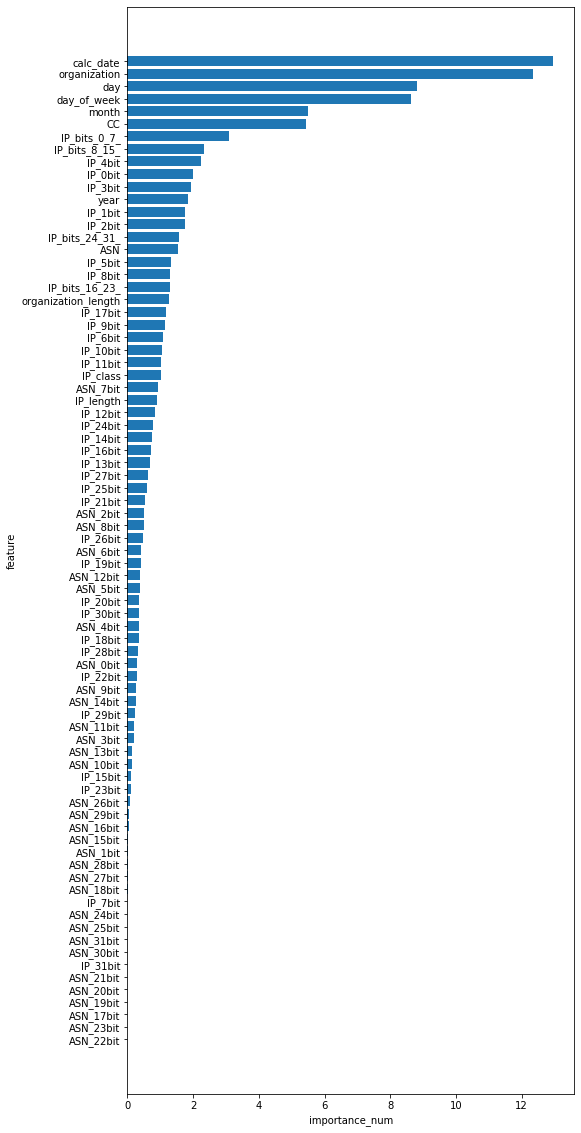

In [112]:
plt.figure(figsize=(8, 20))
feature = cat_model.feature_importances_
#特徴量の名前
label = X_train.columns[0:]
#特徴量の重要度順(降順)
indices = np.argsort(feature)[::1]

# プロット
x = range(len(feature))
y = feature[indices]
y_label = label[indices]
plt.barh(x, y, align = 'center')
plt.yticks(x, y_label)
plt.xlabel("importance_num")
plt.ylabel("feature")
plt.show()

## アンサンブル学習
- xgboostとlightgbmの予測確率を4:5で重み付き平均

In [113]:
X = data2.drop(columns=['IP','domain', 'day_of_week', 'organization', 'blacklist_source', 'label', 'encoded_label', 'is_malware', 'is_fs', 'is_phishing', 'is_exploit',
                                     'is_pup', 'is_spammers', 'date'], inplace=False)
y = data2['encoded_label']

X_train, X_test, y_train, y_test = train_test_split(
                         X, y, test_size=0.6, random_state=0, stratify=y)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [114]:
# random_state=0でtrainとtestに分割した場合
proba_xgb = xgb_model.predict_proba(X_test)
proba_lgb = lgb_model.predict(X_test)
proba_avg = np.average([proba_xgb, proba_lgb], axis=0, weights=[4, 5])
y_pred = np.argmax(proba_avg, axis=1)
accuracy = precision_score(y_test, y_pred, average='weighted')
print(accuracy)
print(f'混同行列:')
print(confusion_matrix(y_test, y_pred))
print(f'各攻撃種別の正解率:')
for attack, score in zip(['malware', 'fs', 'phishing', 'exploit', 'pup', 'spammers'], precision_recall_fscore_support(y_test, y_pred)[0]):
    print(f"\t{attack}:{score}")

0.9383999044110835
混同行列:
[[583437  10379   4511   4882    432     61]
 [ 17165 159836    693    781    113      6]
 [  2994    211  95162    121      0      1]
 [  9700    741    845  24735     11     56]
 [  2817    157      2     23  23150      0]
 [   576     55      0     58      0    926]]
各攻撃種別の正解率:
	malware:0.946079790623799
	fs:0.9326463569048716
	phishing:0.9402151897483525
	exploit:0.8083333333333333
	pup:0.9765460221041087
	spammers:0.8819047619047619


In [115]:
lgb_params = {
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'verbosity': 0,
        'boosting_type': 'gbdt',
        'num_class': 6,
        'num_threads' :5,
        'lambda_l1': 2.2086677914013376e-06, 
        'lambda_l2': 4.4108778786117435, 
        'num_leaves': 3028, 
        'feature_fraction': 0.4166780247209261,
        'bagging_fraction': 0.9765522862335396, 
        'bagging_freq': 4, 
        'min_child_samples': 33,
}

xgb_params = {
        'objective': 'multiclass',
        'eval_metric': 'mlogloss',
        'num_class': 6,
        'nthread':5,
        'n_estimators':10000,
         'min_child_weight': 1.1532937523721634,
         'max_depth': 29,
         'subsample': 0.8981736421493007, 
         'colsample_bytree': 0.6348337607190762,
         'gamma': 0.014803168572311178,
         'alpha': 0.000647260743734733, 
         'lambda': 4.161419436889356e-06,
         'verbosity':0
         
}


def do_ensemble(rs):
    X = data2.drop(columns=['IP','domain', 'day_of_week', 'organization', 'blacklist_source', 'label', 'encoded_label', 'is_malware', 'is_fs', 'is_phishing', 'is_exploit',
                                         'is_pup', 'is_spammers', 'date'], inplace=False)
    y = data2['encoded_label']

    X_train, X_test, y_train, y_test = train_test_split(
                             X, y, test_size=0.6, random_state=rs, stratify=y)
    
    xgb_model = xgb.XGBClassifier(**xgb_params, silent=False)
    xgb_model.fit(X_train, y_train, 
                             early_stopping_rounds=50, 
                             eval_set=[(X_test, y_test)],
                            verbose=0,
                             )
    
    train_data = lgb.Dataset(X_train, label=y_train)
    eval_data = lgb.Dataset(X_test, label=y_test, reference= train_data)

    lgb_model = lgb.train(lgb_params, train_data,
                                        valid_sets=eval_data,
                                        num_boost_round=2000,
                                        early_stopping_rounds=50,
                                        verbose_eval=False)
    
    proba_xgb = xgb_model.predict_proba(X_test)
    proba_lgb = lgb_model.predict(X_test)
    proba_avg = np.average([proba_xgb, proba_lgb], axis=0, weights=[4, 5])
    y_pred = np.argmax(proba_avg, axis=1)
    accuracy = precision_score(y_test, y_pred, average='weighted')
    print(accuracy)
    print(f'混同行列:')
    print(confusion_matrix(y_test, y_pred))
    print(f'各攻撃種別の正解率:')
    for attack, score in zip(['malware', 'fs', 'phishing', 'exploit', 'pup', 'spammers'], precision_recall_fscore_support(y_test, y_pred)[0]):
        print(f"\t{attack}:{score}")
    print()

- 再現実験と同様にrandom_stateの値を変えて4回行う

In [116]:
for rs in [100, 5000, 10000, 1000000]:
    do_ensemble(rs)

0.9381704376644585
混同行列:
[[583605   9911   4718   4897    484     87]
 [ 17629 159260    726    842    121     16]
 [  2919    184  95260    126      0      0]
 [  9775    642    781  24825     10     55]
 [  2895    133      3     12  23106      0]
 [   524     64      1     79      0    947]]
各攻撃種別の正解率:
	malware:0.9453435426105578
	fs:0.9357556670622936
	phishing:0.9386238902738228
	exploit:0.8065040122153276
	pup:0.9740736056658656
	spammers:0.8570135746606334

0.9385022081785022
混同行列:
[[583715  10162   4650   4716    385     74]
 [ 17137 159910    706    710    114     17]
 [  3061    185  95071    172      0      0]
 [  9914    771    719  24629      9     46]
 [  2900    151      0     12  23086      0]
 [   549     54      1     81      0    930]]
各攻撃種別の正解率:
	malware:0.9456304797205788
	fs:0.9338737276109161
	phishing:0.9399290142070452
	exploit:0.8123021108179419
	pup:0.9784691023141476
	spammers:0.8716026241799437

0.9376031220361732
混同行列:
[[583354  10468   4735   4683    406 

- これら値もスライドと若干のズレがあるが、おそらく説明の都合上、特徴量の追加する順番を変更してしまったことが原因

## 今後の展望
- 各攻撃種別でOneVsAllをやってみる
- 日付情報の特徴量の寄与を確認する(year, month, dayなどを除いた場合と、それらだけで学習させた場合を比較する)
- IPアドレスが動的か静的かの特徴量を追加する(これは簡単ではないらしい)
- アンサンブル学習のやり方を工夫する
- etc...